# Introduction to ANN's with Keras

## The Multilayer Perceptron & Backpropogation

When an ANN contains a deep stack of hidden layers, it is called a deep nueral network (dnn). The field of deep learning studies DNN's, and more generally models containing deep stacks of computations.

ANN's and DNN's are trained via the `backpropogation` training algorithm, which in short is Gradient Descent using an efficient technique for computing the gradients automatically. The goal of backpropagation is to minimize the error between the predicted output of the network and the actual target values.

The Backpropagation algorithm works by handling one mini-batch at a time (e.g, containing 32 training examples each) and goe through the full training set multiple times. Each pass is called an `epoch`. 

For each training instance the backpropogation algorith works by first making a prediction (forward pass) and measuring the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass) and finally tweaks the connection weights to reduce the error (gradient descent step).

* **Initialization**: Initialize the weights and biases of the neural network with small random values. Define the learning rate, which determines the size of the steps taken during the optimization process.
* **Forward Pass**: Each mini-batch is fed forward through the network layer by layer. Neurons in each layer perform a weighted sum of their inputs, add a bias, and then apply an activation function to produce the output.
* **Calculate Error**: Compare the network's output with the actual target values to calculate the error. The error is typically measured using a loss or cost function, which quantifies the difference between the predicted and actual values.
* **Backward Pass**: The goal is to then update the weights and biases in the network to reduce the error by calculateing the gradient of the error with respect to the weights and biases using the chain rule of calculus. This is done via propagating the gradient backward through the network until the algorithm reaches the input layer. to find how much each weight and bias contributed to the error.
* **Update Weights and Biases**: Adjust the weights and biases in the direction that reduces the error. This is done by subtracting a fraction of the gradient multiplied by the learning rate. The learning rate determines the step size in the weight and bias updates. It's crucial to choose an appropriate learning rate to balance convergence speed and stability.
* **Repeat**: Steps 2 to 5 are repeated for multiple epochs (passes through the entire training dataset) until the network's performance converges to an acceptable level. The backpropagation algorithm essentially iteratively adjusts the weights and biases of the neural network to minimize the error between predicted and actual outputs. This process is an optimization task, and the choice of the loss function, activation functions, and network architecture all play crucial roles in the success of the training process.

In order for the algorithm to work properly, the authors made a key change by replacing the step function with the logistic (sigmoid) function. This was essential, because the step function contains only flat segment so there was no gradient to work with (GD doesn't work on a flat surface) while the logistic function has a well defined nonzero derivitiave everywhere, allowing GD to make some progress at every step. The logistic function is an example of an `activation function`.

### Activation Functions 

An activation function is a mathematical operation applied to the output of each neuron (or node) in a neural network layer. 

Activation functions introduces non-linearity to a DNN, allowing it to learn from and model complex patterns in data. Without non-linear activation functions, the entire neural network would behave like a linear model, regardless of its depth.

The purpose of the activation function can be summarized as follows:

* **Introducing Non-linearity**: Linear transformations (such as weighted sums and biases) are limited to representing linear relationships. By applying non-linear activation functions, the network can learn and approximate non-linear mappings between inputs and outputs.
* **Enabling Complex Representations**: The stacking of non-linear activation functions in deep networks enables the modeling of intricate relationships and hierarchies in data, allowing the network to learn and represent complex patterns.

Here are some commonly used activation functions in deep neural networks:

* **Sigmoid Function (Logistic):**
    * _MOST COMMON_
    * Outputs values between 0 and 1.
    * Historically used in the output layer for binary classification problems, but not as common in hidden layers due to the vanishing gradient problem.
* **Hyperbolic Tangent (tanh)**:
    * _MOST COMMON_
    * Outputs values between -1 and 1.
    * Similar to the sigmoid but with a higher output range.
* **Rectified Linear Unit (ReLU)**:
    * _MOST COMMON_
    * Outputs zero for negative inputs and passes positive inputs as is.
    * Widely used in hidden layers due to its simplicity and effectiveness in training deep networks.
* **Leaky ReLU**:
    * Similar to ReLU but allows a small, non-zero gradient for negative inputs, addressing the "dying ReLU" problem where neurons can become inactive during training.
* **Parametric ReLU (PReLU)**:
    * An extension of Leaky ReLU where  α is learned during training.
* **Exponential Linear Unit (ELU)**:
    * Smoothly saturates for negative inputs, potentially alleviating some issues with ReLU.
    
The choice of activation function depends on the specific characteristics of the data and the problem at hand. Experimentation and consideration of issues like vanishing gradients during training can guide the selection of an appropriate activation function for a given neural network architecture.

## Regression MLP's

If you want to predict a single value (e.g the price of a house, given many it's features) than you just need a single out neuron: it's output as the predicted value. For multivariate regression (e.g predicting multiple values at once), you need one ouput neuron per output dimension. 

In general, when an MLP for regression, you do not want to use any activation functino for the output neurons so they are free to output any rangeof values. 

* If you want to guarantee that the ouput will always be positive, than you can use the `ReLU` or `Softplus` (which is a smooth variant of `ReLU` activation functions in the ouput layer. 
* If you want to guarentee that the output falls within a range of values, than you can use `Logistic` or `Hyperbolic Tangent` activation functions and then scale the labels to the appropriate range: 0 to 1 of the `logistic` function and 0 to 1 for the `Hyperbolic Tangent`.

The loss function to use during training is typically the MSE, but if you have a lot of outliers in the training set, you may prefer to use the MAE instead. You can also use Huber loss, which is a combination of both.

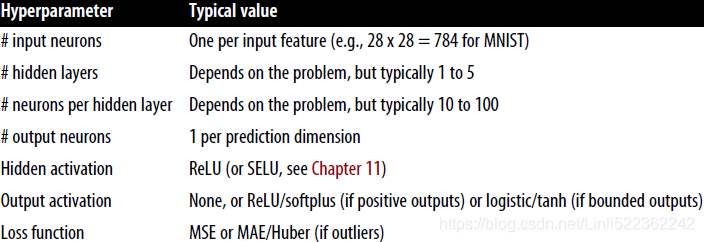

## Regression MLP's

MLP's can also be used for classification tasks. For a binary classification problem, you will jsut need a single ouput neior using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of a given class. The estimated probability of the negative class is equal to 1 minus that number.

MLP's can also easily handle multilabel binary classification tasks - for example, you could have an email classification system that predicts whether the incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons for that both using the logistic activation functions:

* The first would predict the probability that email is spam.
* The second would predict the probability that the email is urgent.

If each instance can belong only to a single class (e.g **Multiclass Classification**, out of three or more possible classes (e.g classes 0 - 9 for digit image classification) then you need to have one ouput neuron per class, and you should use the `softmax` activation function for the whole output layer. The `softmax` function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, which is required if the classes are exclusive.

Regarding the loss function, since we are predicting the probability distrubutions, the cross-entropy loss function is usually a good choice.

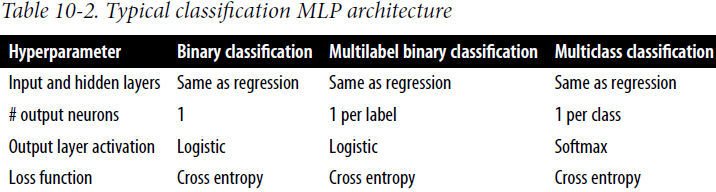

## Implementing MLPs w/ Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of nueral networks, and has been built into Tensorflow.

In [1]:
import tensorflow as tf
import keras

print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.13.0
Keras Version: 2.13.1


## Building an Image Classifier Using the Sequential API

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f"Shape of data: {X_train_full.shape}")
print(f"Data Type: {X_train_full.dtype}")

Shape of data: (60000, 28, 28)
Data Type: uint8


Since we are going to scale the features using Gradient Descent, we need to scale the input features. For simplicity, we'll scale the the pixel intensities down to the 0-1 range by dividing them by 255.0

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0,
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Define the class names from 0 - 9:

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

class_names[y_train[0]]

'Coat'

### Creating the model using Sequential API

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* The first line creates a Sequential model, which is the simpliest kiund of Keras model for NN's that are just composed of a single stack of layers connected sequentially.
* Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. Since it is the first layer in the model, you should specifiy the `input_shape`, which doesn't inclue the batch size, only the shape of the instances. Alternatively, you could a `keras.layers.InputLayer(input_shape=[28,28])` as the first layer.
* Next, we add a dense layer hidden layer with 300 neurons. It will use the `ReLU` activation function. Each Dense layer manages it's own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
* Then we add a second Dense hidden layer with 100 neurons, also using the `ReLU` activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the `Sequential` model:

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

The models `summary()` method displays nall the model's layers including each layers name (which is automatically generated unless you set it when creating the layers

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that the Dense Lyers often a lot of parameters. For example, the first hidden layer has `784 * 300 (connection weights) + 300 (bias terms) = 235,500` parameters! This gives the model quite a lot flexability to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot training data.

You can easily get a models list of layers, to fetch a layer by it's index, or fetch it by name:

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [11]:
model.get_layer('dense_3') is hidden1

True

All the weight parameters of a layer can be accessed using it's `get_weights()` and `set_weights()` methods. For Dense layers, this includes both the connection weights & bias terms:

In [12]:
weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[ 0.05554695  0.01256878  0.03299689 ...  0.06764345  0.03037113
  -0.05165726]
 [ 0.0423123  -0.0087942   0.00456925 ... -0.0200406  -0.06893791
  -0.03823121]
 [ 0.01867315 -0.0179718  -0.05988745 ...  0.01291826  0.00085076
   0.0675347 ]
 ...
 [-0.00365233 -0.03384567  0.03932574 ... -0.0281551   0.02965011
   0.05090114]
 [ 0.04141407 -0.02151838  0.02786927 ...  0.02834836  0.01408258
  -0.05446789]
 [-0.03158003 -0.0507543  -0.04054299 ...  0.00433651 -0.04742504
  -0.03962693]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Notice that the Dense layer initialized the connection wieghts randomly, which is need to break symmetry as we discussed earlier, and the biases were initialized to zeros. If you ever want to use a different initlaization method, you can set `kernal_initializer` or `bias_initi

### Compiling the Model

After a model is created, you must call it's `compile()` method to specify the loss function and optimier to use. Optionally, you can also specify a lsit of extra metrics to compute during training and evaluation:

In [13]:
# Parameters
loss="sparse_categorical_crossentropy"
optimizer="sgd"
metrics=["accuracy"]

# Compile model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

* We use `sparse_categorical_crossentropy`  for the loss function because we have sparse label (e.g for each instance there is just one target class) and the classes are exclusives. If instead we had one target probability per class for each instance (e.g a one hot vector), then we would need to use `categorical_crossentropy` loss function instead. If we were doing binary classifiction, than we would use the `binary_crossentropy` loss function.
* Regarding the optimizer, `sgd` means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform backpropogation .
* Finally, since this is classification, it's useful to measure it's accuracy durin training and evaluation.

### Training & Evaluating the Model

Now the model is ready to be trained, which we can simply do using the `fit` method:

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 820us/step - loss: 0.7086 - accuracy: 0.7667 - val_loss: 0.4983 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.4847 - accuracy: 0.8309 - val_loss: 0.4384 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 1s 770us/step - loss: 0.4409 - accuracy: 0.8454 - val_loss: 0.4198 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 1s 762us/step - loss: 0.4152 - accuracy: 0.8545 - val_loss: 0.4088 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 1s 762us/step - loss: 0.3949 - accuracy: 0.8608 - val_loss: 0.3776 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.3779 - accuracy: 0.8675 - val_loss: 0.3737 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 1s 768us/step - loss: 0.3643 - accuracy: 0.8717 - val_loss: 0.3663 -

The `fit()` method returns a `History` object containing the trianing parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

You can use this dictionary to create a pandas DataFrame and call it's `plot()` method to get the learning curves shown below:

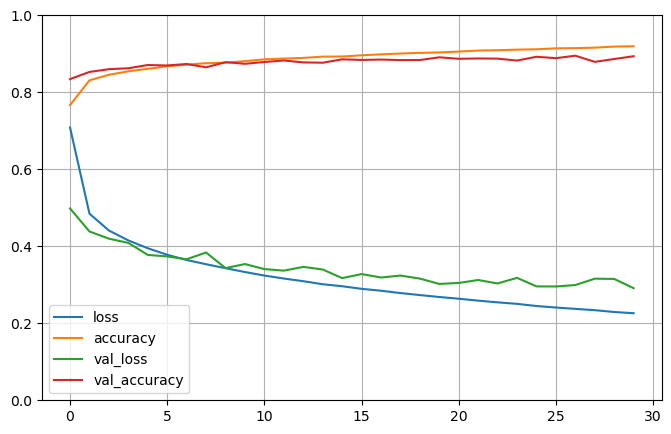

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]

plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during the training, while the training loss and validation loss decrease, which is good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. Genearlly, the training set performance will end up beating the validation performance.

You can tell that that the model has not queite converted yetm as the validation loss is still going down, meaning you should probably continue training. This is as simple as calling the `fit()` again, since Keras just continues training where it left off.

If you are not satsified with the performance of the model, you should go back and tune the hyperparameters. The first one to check is teh learning rate, and if that doesn't help, try another optimizer (and always retune the learning after chaning any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the # of layers, the number of neuorns per layer, the types of activcation functions to use for each hidden layer, or the batch size.

Once you are satisfied with your models validation accuracy, you should evaluate it on the test set to estiamte the generalization error before you deploy it to production via the `evaluate()` method:

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 468us/step - loss: 54.9390 - accuracy: 0.8605


[54.93901824951172, 0.8604999780654907]

It is common to get a slighly lower performance on the test set than on the validation set because the hyperparameters are tuned on the validation set and not the test set. Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estiamte of the generalization error will be too optimistic!

### Using the Model to Make Predictions

Next, we can use the models `predict()` method to make predictions on new instances (since we don't have new instances, we will use the first instances of the initial test set):

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see, for each instance the model estimates one probability per class, from 0-9. If you only care about the class with the highest estimated probability (even if that probability is quite low, than you can use the following code:

In [25]:
import numpy as np

y_pred = np.argmax(y_proba,axis=1)
print(y_pred)
np.array(class_names)[y_pred]


[9 2 1]


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

Now you know how to use the sequential API to build, train, evaluate, and use a classification MLP. But what about regression?

## Building a Regression MLP using the Sequential API

Let's switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn's `fetch_california_housing()` function, since it contains only numerical values and there is no missing values:

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# Split the data into train, test, and validation splits
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Using the Sequential API to build, train, evaluate and use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are: 

* The ouput layer has a single neuron, since we only want to proedcit a single value.
* There is no activation function
* The loss function is the MSE

Since the dataset is quite noisy, we just use a single hidden layer with the fewer neurons than before to avoid overfitting:

In [32]:
# Create the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Complie the model
loss="mean_squared_error"
optimizer="sgd"

model.compile(loss=loss, optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 474us/step - loss: 0.9795 - val_loss: 0.7471
Epoch 2/20
363/363 [==============================] - 0s 363us/step - loss: 0.4864 - val_loss: 0.5143
Epoch 3/20
363/363 [==============================] - 0s 361us/step - loss: 0.4809 - val_loss: 0.4725
Epoch 4/20
363/363 [==============================] - 0s 363us/step - loss: 0.4276 - val_loss: 0.4358
Epoch 5/20
363/363 [==============================] - 0s 365us/step - loss: 0.4082 - val_loss: 0.4254
Epoch 6/20
363/363 [==============================] - 0s 359us/step - loss: 0.4008 - val_loss: 0.4198
Epoch 7/20
363/363 [==============================] - 0s 364us/step - loss: 0.3956 - val_loss: 0.4245
Epoch 8/20
363/363 [==============================] - 0s 360us/step - loss: 0.3918 - val_loss: 0.4123
Epoch 9/20
363/363 [==============================] - 0s 384us/step - loss: 0.3882 - val_loss: 0.4106
Epoch 10/20
363/363 [==============================] - 0s 361us/step - loss: 0.385

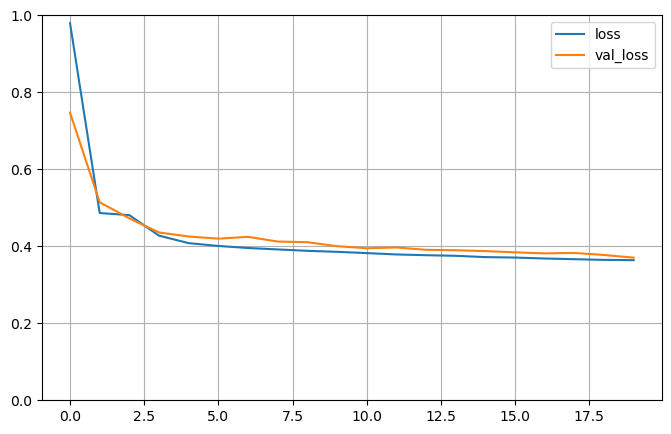

In [33]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]

plt.show()

In [34]:
# Evaluate model performance
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 325us/step - loss: 0.3761


0.37606921792030334

In [38]:
X_new = X_test[:3] # Pretend these are new instances
y_pred = model.predict(X_new)

print(f"Predictions: {y_pred}")
print(f"Labels: {y_test[:3]}")

1/1 [==============================] - 0s 15ms/step
Predictions: [[3.5013378]
 [1.7640764]
 [1.0399872]]
Labels: [3.074 1.489 0.986]


As you can see, the Sequential API is easy to use. However, although `Sequential` models are extremely common, it is sometimes useful to build neural networks with more complex topologies or w/ multiple inputs or outputs. For this purpose, Keras offers the Functional API.

## Building Complex Models using the Functional API

One example of a nonsequential NN is a `Wide & Deep` NN, which was introduced in 2016. It connects all or parts of the inputs directoly to the output layer, which makes it possible for the NN to learn both deep patterns (using the deep path) and simple rules (through the short path). 

In contrast, a regular MLP forces all the data to flow through teh full stack of layers, meaning simple patters in the data may end up getting distorted by this sequence. 

Let's build such a network using the same data:

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

* First, we creat an input object. This is a specification of the kind of input the model wil lget, including it's `shape` and `dtype`. A model may actually have multiple inputs
* Next, we create the `Dense` layer with 30 neurons, usinghte ReLU activation function. As soon as it's created, notice that we call it like a function, passing it to the input. This is why this is called teh **Functional API**. Note that we are just telling Keras how it should connect he layers together; no actual data is being processed yet.
* We then create a second hidden layer, and again we use it as a function by passing it the output of the first hidden layer.
* Next, we creat a `Concatenate` layer, and once again we immediately use it like a function to concatenate the input and the output of the second hidden layer. 
* Then we creat the output layer with a single neuron and no activation function and we call it like a function by passing it the result of the concatenation.
* Lastly, we create a Keras model, specifiying which inputs and outputs to use.

Once you have built the model, everything is exactly like earlier:

In [41]:
# Complie the model
loss="mean_squared_error"
optimizer="sgd"

model.compile(loss=loss, optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 494us/step - loss: 0.8298 - val_loss: 2.0481
Epoch 2/20
363/363 [==============================] - 0s 368us/step - loss: 0.9100 - val_loss: 20.5099
Epoch 3/20
363/363 [==============================] - 0s 374us/step - loss: 2.2171 - val_loss: 10.0465
Epoch 4/20
363/363 [==============================] - 0s 371us/step - loss: 1.2136 - val_loss: 4.3973
Epoch 5/20
363/363 [==============================] - 0s 367us/step - loss: 32.0905 - val_loss: 2.4728
Epoch 6/20
363/363 [==============================] - 0s 365us/step - loss: 3.4652 - val_loss: 0.9537
Epoch 7/20
363/363 [==============================] - 0s 401us/step - loss: 1.2781 - val_loss: 17.7942
Epoch 8/20
363/363 [==============================] - 0s 420us/step - loss: 1.5650 - val_loss: 2.0111
Epoch 9/20
363/363 [==============================] - 0s 371us/step - loss: 0.5462 - val_loss: 0.6901
Epoch 10/20
363/363 [==============================] - 0s 367us/step - loss: 1

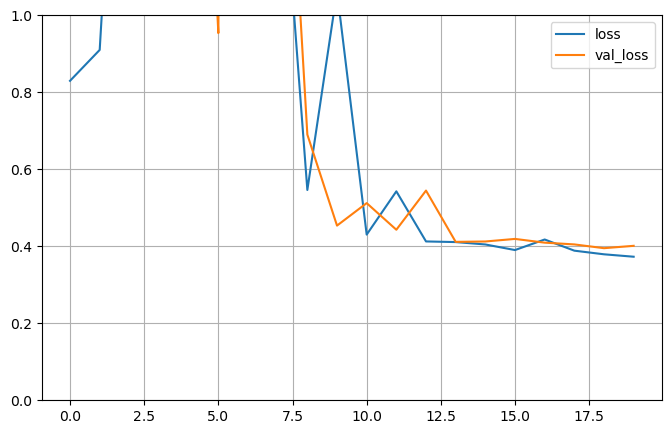

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]

plt.show()

In [43]:
# Evaluate model performance
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 309us/step - loss: 0.4015


0.40145212411880493

In [44]:
X_new = X_test[:3] # Pretend these are new instances
y_pred = model.predict(X_new)

print(f"Predictions: {y_pred}")
print(f"Labels: {y_test[:3]}")

1/1 [==============================] - 0s 19ms/step
Predictions: [[3.4267812]
 [1.5484924]
 [1.1961122]]
Labels: [3.074 1.489 0.986]


But what if you want to send a subset of the features through the wide path and a different subset through the deep path? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4) and 6 features through the deep path (features 2 to 7):

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Now we can compile the model as usual, but when the call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a paior of matrices (`X_train_A`, `X_train_B`): one per input. The same is true for `X_valid`, and also for `X_test` and `X_new` when you call `evaluate()` or `predict()`:

In [62]:
# Complile the model
loss="mse"
optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3)

model.compile(loss=loss, optimizer=optimizer)

# Split Data into A & B groups
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Train the model
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

# Evalute MSE
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(f"MSE: {mse_test}")

# Predictions
y_pred = model.predict((X_new_A, X_new_B))
print(f"Predictions: {y_pred}")
print(f"Labels: {y_test[:3]}")

Epoch 1/20
363/363 [==============================] - 0s 510us/step - loss: 1.7894 - val_loss: 0.8504
Epoch 2/20
363/363 [==============================] - 0s 394us/step - loss: 0.7496 - val_loss: 0.7110
Epoch 3/20
363/363 [==============================] - 0s 396us/step - loss: 0.6650 - val_loss: 0.6607
Epoch 4/20
363/363 [==============================] - 0s 393us/step - loss: 0.6236 - val_loss: 0.6267
Epoch 5/20
363/363 [==============================] - 0s 391us/step - loss: 0.5932 - val_loss: 0.5981
Epoch 6/20
363/363 [==============================] - 0s 429us/step - loss: 0.5696 - val_loss: 0.5768
Epoch 7/20
363/363 [==============================] - 0s 395us/step - loss: 0.5490 - val_loss: 0.5578
Epoch 8/20
363/363 [==============================] - 0s 400us/step - loss: 0.5312 - val_loss: 0.5477
Epoch 9/20
363/363 [==============================] - 0s 389us/step - loss: 0.5161 - val_loss: 0.5355
Epoch 10/20
363/363 [==============================] - 0s 396us/step - loss: 0.503

There are many use cases in which you may want to have multiple outputs:

* The task may demand it. For example, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the objects center, as well as it's width and height) and a classification task.
* Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single NN with one output per task, because the NN can learn featuires in the data that are useful across tasks. For example, you could perform multitaks classification on picture of faces, using one output to classify the persons facial expression and another output to identify whether they are wearing glasses or not.
* Another use case is as a regularization technique (e.g training constant whose objective is to reduce overfitting and thus improve the models ability to generalize). For example, you many want to add some auxiliary outputs in a NN's architecture to ensure that the underlying part of hte network learns something useful on its own w/out relying on the rest of the network.

Extra outpus is quite easy: just connect them to the appropriate layers and add them to your models list of outputs. 

Each output will need it's own loss function, and therefore, when we compile the model, we should pass a list of losses (if you pass a single loss, Keras will assume thte same loss must be applied to all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than the regularization output (as it is just used for regularization), so we want to give the mian output's loss a much greater weight:

In [57]:
loss=['mse', 'mse']
loss_weights=[0.9, 0.1]
optimizer="sgd"

model.compile(loss=loss, loss_weights=loss_weights, optimizer=optimizer)

Next, we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we need to pass (`y_train`, `y_train`). The same goes for `y_valid` and `y_test`:

In [58]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 541us/step - loss: 0.3836 - val_loss: 0.3885
Epoch 2/20
363/363 [==============================] - 0s 406us/step - loss: 0.3805 - val_loss: 0.3833
Epoch 3/20
363/363 [==============================] - 0s 407us/step - loss: 0.3698 - val_loss: 0.3734
Epoch 4/20
363/363 [==============================] - 0s 405us/step - loss: 0.3626 - val_loss: 0.3661
Epoch 5/20
363/363 [==============================] - 0s 403us/step - loss: 0.3553 - val_loss: 0.3653
Epoch 6/20
363/363 [==============================] - 0s 409us/step - loss: 0.3505 - val_loss: 0.3659
Epoch 7/20
363/363 [==============================] - 0s 404us/step - loss: 0.3437 - val_loss: 0.3560
Epoch 8/20
363/363 [==============================] - 0s 408us/step - loss: 0.3372 - val_loss: 0.3548
Epoch 9/20
363/363 [==============================] - 0s 406us/step - loss: 0.3345 - val_loss: 0.3420
Epoch 10/20
363/363 [==============================] - 0s 403us/step - loss: 0.331

When we evaluate the model, Keras will return the total loss, as well as the individual losses:

## Using the Subclassing APU to Build Dynamic Models

Both the Sequential API and the Functional API are declaritive: you start by declaring which layers you want to use and how they should be connected, and only then can you start the feeding the model some data for training or inference.

Having a static model like this has its advantages:

* It's structure can be displayed and analyzed
* It's easy to debug, and errors can be caught early
* It can easily be saved, cloned, and shared

However, some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, you may want to use a more imperative programming style by using the Subclassing API:

In [60]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.max_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

The extra flexability of being able use added login in the `call` method comes at a cost - your model's architecture is hidden within the `call` method, Keras cannot easily inspect it, clone / save it, check shapes & types ahead of time, and debugging is harder.

Unless you really need the extra flexibility, you should probably stick the the Sequential API or the Functional API

## Saving & Restoring a Model

In [67]:
model.save('my_keras_model.h5')

Saving a model is very easy - you will typically have a script that trains a model & saves it, and one or more scripts (or web service) that load the model and use it to make predictions. Loading the model is just as easy:

In [69]:
model = keras.models.load_model("my_keras_model.h5")

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the `fit()` method to save the checkpoints? Use callbacks!

## Using Callbacks

The `fit()` method accepts a callbacks argument tha tlets you specify a list of all objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [72]:
# Create the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Complie the model
loss="mean_squared_error"
optimizer="sgd"

model.compile(loss=loss, optimizer=optimizer)

# Use callback to save model after each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 305us/step - loss: 3.6789
Epoch 2/10
363/363 [==============================] - 0s 286us/step - loss: 0.4300
Epoch 3/10
363/363 [==============================] - 0s 282us/step - loss: 0.3824
Epoch 4/10
363/363 [==============================] - 0s 288us/step - loss: 0.3670
Epoch 5/10
363/363 [==============================] - 0s 282us/step - loss: 0.3725
Epoch 6/10
363/363 [==============================] - 0s 285us/step - loss: 0.3525
Epoch 7/10
363/363 [==============================] - 0s 283us/step - loss: 0.3517
Epoch 8/10
363/363 [==============================] - 0s 280us/step - loss: 0.3455
Epoch 9/10
363/363 [==============================] - 0s 283us/step - loss: 0.3423
Epoch 10/10
363/363 [==============================] - 0s 283us/step - loss: 0.3391


If you use va validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint`. In this case, it will only save your model when it's performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set - simply restore the last model save during training.

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

# Roll back to the best model
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 0s 486us/step - loss: 0.3356 - val_loss: 0.3371
Epoch 2/10
363/363 [==============================] - 0s 374us/step - loss: 0.3336 - val_loss: 0.3410
Epoch 3/10
180/363 [=============>................] - ETA: 0s - loss: 0.3426

/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 388us/step - loss: 0.3301 - val_loss: 0.3312
Epoch 4/10
363/363 [==============================] - 0s 391us/step - loss: 0.3299 - val_loss: 0.3305
Epoch 5/10
363/363 [==============================] - 0s 382us/step - loss: 0.3262 - val_loss: 0.3266
Epoch 6/10
363/363 [==============================] - 0s 373us/step - loss: 0.3266 - val_loss: 0.3265
Epoch 7/10
363/363 [==============================] - 0s 371us/step - loss: 0.3244 - val_loss: 0.3306
Epoch 8/10
363/363 [==============================] - 0s 377us/step - loss: 0.3218 - val_loss: 0.3301
Epoch 9/10
363/363 [==============================] - 0s 373us/step - loss: 0.3223 - val_loss: 0.3352
Epoch 10/10
363/363 [==============================] - 0s 385us/step - loss: 0.3214 - val_loss: 0.3234


Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a # of epochs (defined by the `patience` arugment) and it will optionally roll back to the best argument.

You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid asting time & resources):

In [75]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
363/363 [==============================] - 0s 442us/step - loss: 0.3126 - val_loss: 0.3162
Epoch 2/100
363/363 [==============================] - 0s 381us/step - loss: 0.3126 - val_loss: 0.3139
Epoch 3/100
363/363 [==============================] - 0s 402us/step - loss: 0.3172 - val_loss: 0.3141
Epoch 4/100
363/363 [==============================] - 0s 373us/step - loss: 0.3119 - val_loss: 0.3149
Epoch 5/100
363/363 [==============================] - 0s 376us/step - loss: 0.3112 - val_loss: 0.3177
Epoch 6/100
363/363 [==============================] - 0s 368us/step - loss: 0.3101 - val_loss: 0.3180
Epoch 7/100
363/363 [==============================] - 0s 376us/step - loss: 0.3105 - val_loss: 0.3120
Epoch 8/100
363/363 [==============================] - 0s 370us/step - loss: 0.3092 - val_loss: 0.3125
Epoch 9/100
363/363 [==============================] - 0s 372us/step - loss: 0.3089 - val_loss: 0.3158
Epoch 10/100
363/363 [==============================] - 0s 372us/step - l

If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g to detect overfitting):

In [77]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Using TensorBoard for Visualization

TensorBoard is ag rat interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graphh, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clusterd for you, and more! This tool is installed automatically when you install TensorFlow, so you have already have it. 

To use it, you must modify your program so that it ouputs the data you want to visualize to special binary log files called _event files_. Let's start by defining the root log directory wwe will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current data an time so that's different every run:

In [78]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() #e.g, './my_logs/run_2019_06_07_15_15_22'

The good news is that Keras provides a nice `TensorBoard()` callback:

In [80]:
# [...] Build & Compile Model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/10
363/363 [==============================] - 0s 464us/step - loss: 0.2870 - val_loss: 0.3012
Epoch 2/10
363/363 [==============================] - 0s 406us/step - loss: 0.2865 - val_loss: 0.3016
Epoch 3/10
363/363 [==============================] - 0s 405us/step - loss: 0.2862 - val_loss: 0.3048
Epoch 4/10
363/363 [==============================] - 0s 432us/step - loss: 0.2866 - val_loss: 0.3024
Epoch 5/10
363/363 [==============================] - 0s 406us/step - loss: 0.2852 - val_loss: 0.3013
Epoch 6/10
363/363 [==============================] - 0s 401us/step - loss: 0.2858 - val_loss: 0.3090
Epoch 7/10
363/363 [==============================] - 0s 406us/step - loss: 0.2859 - val_loss: 0.3090
Epoch 8/10
363/363 [==============================] - 0s 410us/step - loss: 0.2853 - val_loss: 0.3504
Epoch 9/10
363/363 [==============================] - 0s 408us/step - loss: 0.2917 - val_loss: 0.3157
Epoch 10/10
363/363 [==============================] - 0s 402us/step - loss: 0.287

Next, you need to start the TensorBoard server. This can be done directly within Jupyter by runing the following commands - the first line loads the TensorBoard extension, and the second line starts a TensorBoard server on port 6006 and connects to it:

In [81]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port 6006

## Fine-Tuning Neural Network Hyperparameters

The flexability of NN's is also one of it's biggest drawbacks - there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the # of layers, the # of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is best for your task?

One option is to simply try as many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross validation). For example we could use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [83]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    # Init Model
    model = keras.models.Sequential()
    
    # Create Input Layers
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    # Create Hidden Layers
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    # Output Layer    
    model.add(keras.layers.Dense(1))
    
    # Compile Model
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Next, let's create a `KerasRegressor` based on this `build_model()` function, since we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors:

In [86]:
%pip install scikeras
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Now we can use this object like a regular Scikit-Learn regressor:

In [88]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10)

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystopping_cb])

mse_test = keras_reg.score(X_test, y_test)

y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 475us/step - loss: 2.2715 - val_loss: 0.5631
Epoch 2/100
363/363 [==============================] - 0s 376us/step - loss: 0.4810 - val_loss: 0.4227
Epoch 3/100
363/363 [==============================] - 0s 374us/step - loss: 0.3985 - val_loss: 0.3960
Epoch 4/100
363/363 [==============================] - 0s 375us/step - loss: 0.3801 - val_loss: 0.3865
Epoch 5/100
363/363 [==============================] - 0s 367us/step - loss: 0.3722 - val_loss: 0.3828
Epoch 6/100
363/363 [==============================] - 0s 371us/step - loss: 0.3664 - val_loss: 0.3837
Epoch 7/100
363/363 [==============================] - 0s 407us/step - loss: 0.3626 - val_loss: 0.3718
Epoch 8/100
363/363 [==============================] - 0s 488us/step - loss: 0.3588 - val_loss: 0.3700
Epoch 9/100
363/363 [==============================] - 0s 389us/step - loss: 0.3570 - val_loss: 0.3706
Epoch 10/100
363/363 [==============================] - 0s 396us/step - l

Epoch 80/100
363/363 [==============================] - 0s 366us/step - loss: 0.3097 - val_loss: 0.3209
Epoch 81/100
363/363 [==============================] - 0s 365us/step - loss: 0.3089 - val_loss: 0.3177
Epoch 82/100
363/363 [==============================] - 0s 366us/step - loss: 0.3085 - val_loss: 0.3277
Epoch 83/100
363/363 [==============================] - 0s 368us/step - loss: 0.3129 - val_loss: 0.3178
Epoch 84/100
363/363 [==============================] - 0s 368us/step - loss: 0.3105 - val_loss: 0.3214
Epoch 85/100
363/363 [==============================] - 0s 367us/step - loss: 0.3128 - val_loss: 0.3153
Epoch 86/100
363/363 [==============================] - 0s 363us/step - loss: 0.3075 - val_loss: 0.3153
Epoch 87/100
363/363 [==============================] - 0s 367us/step - loss: 0.3073 - val_loss: 0.3148
Epoch 88/100
363/363 [==============================] - 0s 366us/step - loss: 0.3071 - val_loss: 0.3220
Epoch 89/100
363/363 [==============================] - 0s 365us

We don't want to train and evaulate a single model like this - we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search.

Let's try to explore teh # of hidden layers, the number of neurons, and the learning rate:

In [91]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [109]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": [10,15,20],
    "learning_rate": [3e-4]
}

keras_reg = KerasRegressor(model=build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8])
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[earlystopping_cb])

Epoch 1/100
242/242 [==============================] - 0s 591us/step - loss: 1.2628 - val_loss: 0.6743
Epoch 2/100
242/242 [==============================] - 0s 425us/step - loss: 0.5773 - val_loss: 0.5332
Epoch 3/100
242/242 [==============================] - 0s 422us/step - loss: 0.4822 - val_loss: 0.4741
Epoch 4/100
242/242 [==============================] - 0s 425us/step - loss: 0.4414 - val_loss: 0.4468
Epoch 5/100
242/242 [==============================] - 0s 426us/step - loss: 0.4198 - val_loss: 0.4298
Epoch 6/100
242/242 [==============================] - 0s 420us/step - loss: 0.4069 - val_loss: 0.4169
Epoch 7/100
242/242 [==============================] - 0s 419us/step - loss: 0.3961 - val_loss: 0.4078
Epoch 8/100
242/242 [==============================] - 0s 421us/step - loss: 0.3884 - val_loss: 0.3949
Epoch 9/100
242/242 [==============================] - 0s 430us/step - loss: 0.3823 - val_loss: 0.3933
Epoch 10/100
242/242 [==============================] - 0s 424us/step - l

Epoch 80/100
242/242 [==============================] - 0s 426us/step - loss: 0.3077 - val_loss: 0.3192
Epoch 81/100
242/242 [==============================] - 0s 417us/step - loss: 0.3080 - val_loss: 0.3215
Epoch 82/100
242/242 [==============================] - 0s 432us/step - loss: 0.3063 - val_loss: 0.3206
Epoch 83/100
242/242 [==============================] - 0s 422us/step - loss: 0.3062 - val_loss: 0.3214
Epoch 84/100
242/242 [==============================] - 0s 421us/step - loss: 0.3057 - val_loss: 0.3154
Epoch 85/100
242/242 [==============================] - 0s 424us/step - loss: 0.3063 - val_loss: 0.3247
Epoch 86/100
242/242 [==============================] - 0s 421us/step - loss: 0.3060 - val_loss: 0.3176
Epoch 87/100
242/242 [==============================] - 0s 418us/step - loss: 0.3061 - val_loss: 0.3179
Epoch 88/100
242/242 [==============================] - 0s 417us/step - loss: 0.3058 - val_loss: 0.3171
Epoch 89/100
242/242 [==============================] - 0s 419us

Epoch 1/100
242/242 [==============================] - 0s 585us/step - loss: 1.0830 - val_loss: 0.9737
Epoch 2/100
242/242 [==============================] - 0s 418us/step - loss: 0.8316 - val_loss: 0.7046
Epoch 3/100
242/242 [==============================] - 0s 421us/step - loss: 0.5722 - val_loss: 0.4869
Epoch 4/100
242/242 [==============================] - 0s 425us/step - loss: 0.4338 - val_loss: 0.4544
Epoch 5/100
242/242 [==============================] - 0s 418us/step - loss: 0.4127 - val_loss: 0.4389
Epoch 6/100
242/242 [==============================] - 0s 417us/step - loss: 0.3990 - val_loss: 0.4268
Epoch 7/100
242/242 [==============================] - 0s 421us/step - loss: 0.3894 - val_loss: 0.4173
Epoch 8/100
242/242 [==============================] - 0s 419us/step - loss: 0.3826 - val_loss: 0.4128
Epoch 9/100
242/242 [==============================] - 0s 422us/step - loss: 0.3769 - val_loss: 0.4086
Epoch 10/100
242/242 [==============================] - 0s 420us/step - l

Epoch 80/100
242/242 [==============================] - 0s 422us/step - loss: 0.3012 - val_loss: 0.3197
Epoch 81/100
242/242 [==============================] - 0s 424us/step - loss: 0.3019 - val_loss: 0.3180
Epoch 82/100
242/242 [==============================] - 0s 418us/step - loss: 0.3012 - val_loss: 0.3316
Epoch 83/100
242/242 [==============================] - 0s 419us/step - loss: 0.2995 - val_loss: 0.3296
Epoch 84/100
242/242 [==============================] - 0s 421us/step - loss: 0.3003 - val_loss: 0.3175
Epoch 85/100
242/242 [==============================] - 0s 413us/step - loss: 0.2985 - val_loss: 0.3310
Epoch 86/100
242/242 [==============================] - 0s 416us/step - loss: 0.2991 - val_loss: 0.3195
Epoch 87/100
242/242 [==============================] - 0s 425us/step - loss: 0.3009 - val_loss: 0.3229
Epoch 88/100
242/242 [==============================] - 0s 419us/step - loss: 0.2985 - val_loss: 0.3249
Epoch 89/100
242/242 [==============================] - 0s 420us

Epoch 1/100
242/242 [==============================] - 0s 588us/step - loss: 0.8524 - val_loss: 0.6593
Epoch 2/100
242/242 [==============================] - 0s 415us/step - loss: 0.5752 - val_loss: 0.5507
Epoch 3/100
242/242 [==============================] - 0s 417us/step - loss: 0.4955 - val_loss: 0.4854
Epoch 4/100
242/242 [==============================] - 0s 427us/step - loss: 0.4545 - val_loss: 0.4526
Epoch 5/100
242/242 [==============================] - 0s 424us/step - loss: 0.4275 - val_loss: 0.4400
Epoch 6/100
242/242 [==============================] - 0s 417us/step - loss: 0.4129 - val_loss: 0.4279
Epoch 7/100
242/242 [==============================] - 0s 418us/step - loss: 0.4015 - val_loss: 0.4130
Epoch 8/100
242/242 [==============================] - 0s 420us/step - loss: 0.3944 - val_loss: 0.4081
Epoch 9/100
242/242 [==============================] - 0s 422us/step - loss: 0.3874 - val_loss: 0.4005
Epoch 10/100
242/242 [==============================] - 0s 419us/step - l

Epoch 80/100
242/242 [==============================] - 0s 416us/step - loss: 0.2948 - val_loss: 0.3132
Epoch 81/100
242/242 [==============================] - 0s 426us/step - loss: 0.2965 - val_loss: 0.3128
Epoch 82/100
242/242 [==============================] - 0s 421us/step - loss: 0.2953 - val_loss: 0.3129
Epoch 83/100
242/242 [==============================] - 0s 406us/step - loss: 0.2948 - val_loss: 0.3062
Epoch 84/100
242/242 [==============================] - 0s 412us/step - loss: 0.2943 - val_loss: 0.3060
Epoch 85/100
242/242 [==============================] - 0s 430us/step - loss: 0.2920 - val_loss: 0.3057
Epoch 86/100
242/242 [==============================] - 0s 432us/step - loss: 0.2929 - val_loss: 0.3041
Epoch 87/100
242/242 [==============================] - 0s 444us/step - loss: 0.2934 - val_loss: 0.3092
Epoch 88/100
242/242 [==============================] - 0s 457us/step - loss: 0.2927 - val_loss: 0.3074
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 608us/step - loss: 0.9410 - val_loss: 0.6017
Epoch 2/100
242/242 [==============================] - 0s 415us/step - loss: 0.5269 - val_loss: 0.5095
Epoch 3/100
242/242 [==============================] - 0s 420us/step - loss: 0.4738 - val_loss: 0.4789
Epoch 4/100
242/242 [==============================] - 0s 422us/step - loss: 0.4435 - val_loss: 0.4415
Epoch 5/100
242/242 [==============================] - 0s 418us/step - loss: 0.4203 - val_loss: 0.4165
Epoch 6/100
242/242 [==============================] - 0s 423us/step - loss: 0.4052 - val_loss: 0.4136
Epoch 7/100
242/242 [==============================] - 0s 420us/step - loss: 0.3938 - val_loss: 0.3966
Epoch 8/100
242/242 [==============================] - 0s 426us/step - loss: 0.3842 - val_loss: 0.3978
Epoch 9/100
242/242 [==============================] - 0s 431us/step - loss: 0.3780 - val_loss: 0.3823
Epoch 10/100
242/242 [==============================] - 0s 417us/step - l

Epoch 80/100
242/242 [==============================] - 0s 470us/step - loss: 0.2848 - val_loss: 0.3080
Epoch 81/100
242/242 [==============================] - 0s 425us/step - loss: 0.2853 - val_loss: 0.3137
Epoch 82/100
242/242 [==============================] - 0s 421us/step - loss: 0.2862 - val_loss: 0.3070
Epoch 83/100
242/242 [==============================] - 0s 420us/step - loss: 0.2861 - val_loss: 0.3032
Epoch 84/100
242/242 [==============================] - 0s 415us/step - loss: 0.2838 - val_loss: 0.3076
Epoch 85/100
242/242 [==============================] - 0s 429us/step - loss: 0.2851 - val_loss: 0.2996
Epoch 86/100
242/242 [==============================] - 0s 419us/step - loss: 0.2850 - val_loss: 0.2987
Epoch 87/100
242/242 [==============================] - 0s 418us/step - loss: 0.2835 - val_loss: 0.3168
Epoch 88/100
242/242 [==============================] - 0s 416us/step - loss: 0.2829 - val_loss: 0.2999
Epoch 89/100
242/242 [==============================] - 0s 420us

Epoch 1/100
242/242 [==============================] - 0s 625us/step - loss: 1.3845 - val_loss: 0.7464
Epoch 2/100
242/242 [==============================] - 0s 448us/step - loss: 1.0385 - val_loss: 0.5836
Epoch 3/100
242/242 [==============================] - 0s 428us/step - loss: 0.4579 - val_loss: 0.4350
Epoch 4/100
242/242 [==============================] - 0s 418us/step - loss: 0.3983 - val_loss: 0.4050
Epoch 5/100
242/242 [==============================] - 0s 419us/step - loss: 0.3789 - val_loss: 0.3916
Epoch 6/100
242/242 [==============================] - 0s 419us/step - loss: 0.3676 - val_loss: 0.3857
Epoch 7/100
242/242 [==============================] - 0s 422us/step - loss: 0.3590 - val_loss: 0.3820
Epoch 8/100
242/242 [==============================] - 0s 417us/step - loss: 0.3532 - val_loss: 0.3749
Epoch 9/100
242/242 [==============================] - 0s 420us/step - loss: 0.3471 - val_loss: 0.3822
Epoch 10/100
242/242 [==============================] - 0s 419us/step - l

Epoch 80/100
242/242 [==============================] - 0s 423us/step - loss: 0.2769 - val_loss: 0.3088
Epoch 81/100
242/242 [==============================] - 0s 417us/step - loss: 0.2760 - val_loss: 0.3148
Epoch 82/100
242/242 [==============================] - 0s 421us/step - loss: 0.2774 - val_loss: 0.3107
Epoch 83/100
242/242 [==============================] - 0s 418us/step - loss: 0.2761 - val_loss: 0.3111
Epoch 84/100
242/242 [==============================] - 0s 415us/step - loss: 0.2749 - val_loss: 0.3103
Epoch 85/100
242/242 [==============================] - 0s 418us/step - loss: 0.2752 - val_loss: 0.3266
Epoch 86/100
242/242 [==============================] - 0s 421us/step - loss: 0.2745 - val_loss: 0.3136
Epoch 87/100
242/242 [==============================] - 0s 419us/step - loss: 0.2749 - val_loss: 0.3053
Epoch 88/100
242/242 [==============================] - 0s 422us/step - loss: 0.2737 - val_loss: 0.3061
Epoch 89/100
242/242 [==============================] - 0s 416us

Epoch 1/100
242/242 [==============================] - 0s 609us/step - loss: 0.7958 - val_loss: 0.6545
Epoch 2/100
242/242 [==============================] - 0s 423us/step - loss: 0.5554 - val_loss: 0.5453
Epoch 3/100
242/242 [==============================] - 0s 423us/step - loss: 0.4788 - val_loss: 0.4931
Epoch 4/100
242/242 [==============================] - 0s 419us/step - loss: 0.4364 - val_loss: 0.4632
Epoch 5/100
242/242 [==============================] - 0s 418us/step - loss: 0.4108 - val_loss: 0.4299
Epoch 6/100
242/242 [==============================] - 0s 420us/step - loss: 0.3942 - val_loss: 0.4111
Epoch 7/100
242/242 [==============================] - 0s 422us/step - loss: 0.3892 - val_loss: 0.4015
Epoch 8/100
242/242 [==============================] - 0s 426us/step - loss: 0.3811 - val_loss: 0.3890
Epoch 9/100
242/242 [==============================] - 0s 432us/step - loss: 0.3757 - val_loss: 0.3823
Epoch 10/100
242/242 [==============================] - 0s 426us/step - l

Epoch 80/100
242/242 [==============================] - 0s 425us/step - loss: 0.2880 - val_loss: 0.3175
Epoch 81/100
242/242 [==============================] - 0s 419us/step - loss: 0.2883 - val_loss: 0.3160
Epoch 82/100
242/242 [==============================] - 0s 420us/step - loss: 0.2874 - val_loss: 0.3249
Epoch 83/100
242/242 [==============================] - 0s 490us/step - loss: 0.2873 - val_loss: 0.3199
Epoch 84/100
242/242 [==============================] - 0s 465us/step - loss: 0.2886 - val_loss: 0.3170
Epoch 85/100
242/242 [==============================] - 0s 456us/step - loss: 0.2868 - val_loss: 0.3110
Epoch 86/100
242/242 [==============================] - 0s 460us/step - loss: 0.2869 - val_loss: 0.3162
Epoch 87/100
242/242 [==============================] - 0s 443us/step - loss: 0.2875 - val_loss: 0.3293
Epoch 88/100
242/242 [==============================] - 0s 460us/step - loss: 0.2874 - val_loss: 0.3269
Epoch 89/100
242/242 [==============================] - 0s 474us

Epoch 1/100
242/242 [==============================] - 0s 588us/step - loss: 0.9838 - val_loss: 0.6015
Epoch 2/100
242/242 [==============================] - 0s 413us/step - loss: 0.5196 - val_loss: 0.5019
Epoch 3/100
242/242 [==============================] - 0s 417us/step - loss: 0.4541 - val_loss: 0.4611
Epoch 4/100
242/242 [==============================] - 0s 428us/step - loss: 0.4274 - val_loss: 0.4393
Epoch 5/100
242/242 [==============================] - 0s 417us/step - loss: 0.4159 - val_loss: 0.4314
Epoch 6/100
242/242 [==============================] - 0s 418us/step - loss: 0.4029 - val_loss: 0.4227
Epoch 7/100
242/242 [==============================] - 0s 410us/step - loss: 0.3988 - val_loss: 0.4141
Epoch 8/100
242/242 [==============================] - 0s 413us/step - loss: 0.3959 - val_loss: 0.4162
Epoch 9/100
242/242 [==============================] - 0s 415us/step - loss: 0.3885 - val_loss: 0.4253
Epoch 10/100
242/242 [==============================] - 0s 415us/step - l

Epoch 80/100
242/242 [==============================] - 0s 419us/step - loss: 0.3120 - val_loss: 0.3251
Epoch 81/100
242/242 [==============================] - 0s 419us/step - loss: 0.3104 - val_loss: 0.3226
Epoch 82/100
242/242 [==============================] - 0s 415us/step - loss: 0.3094 - val_loss: 0.3235
Epoch 83/100
242/242 [==============================] - 0s 416us/step - loss: 0.3103 - val_loss: 0.3240
Epoch 84/100
242/242 [==============================] - 0s 419us/step - loss: 0.3086 - val_loss: 0.3263
Epoch 85/100
242/242 [==============================] - 0s 414us/step - loss: 0.3090 - val_loss: 0.3233
Epoch 86/100
242/242 [==============================] - 0s 416us/step - loss: 0.3089 - val_loss: 0.3208
Epoch 87/100
242/242 [==============================] - 0s 415us/step - loss: 0.3087 - val_loss: 0.3180
Epoch 88/100
242/242 [==============================] - 0s 414us/step - loss: 0.3084 - val_loss: 0.3311
Epoch 89/100
242/242 [==============================] - 0s 417us

Epoch 1/100
242/242 [==============================] - 0s 596us/step - loss: 1.0319 - val_loss: 0.8291
Epoch 2/100
242/242 [==============================] - 0s 417us/step - loss: 0.7304 - val_loss: 0.6076
Epoch 3/100
242/242 [==============================] - 0s 513us/step - loss: 0.5483 - val_loss: 0.4940
Epoch 4/100
242/242 [==============================] - 0s 415us/step - loss: 0.4545 - val_loss: 0.4455
Epoch 5/100
242/242 [==============================] - 0s 417us/step - loss: 0.4183 - val_loss: 0.4172
Epoch 6/100
242/242 [==============================] - 0s 416us/step - loss: 0.3972 - val_loss: 0.4087
Epoch 7/100
242/242 [==============================] - 0s 418us/step - loss: 0.3862 - val_loss: 0.3974
Epoch 8/100
242/242 [==============================] - 0s 414us/step - loss: 0.3788 - val_loss: 0.3941
Epoch 9/100
242/242 [==============================] - 0s 416us/step - loss: 0.3736 - val_loss: 0.3859
Epoch 10/100
242/242 [==============================] - 0s 417us/step - l

Epoch 80/100
242/242 [==============================] - 0s 419us/step - loss: 0.3181 - val_loss: 0.3467
Epoch 81/100
242/242 [==============================] - 0s 415us/step - loss: 0.3158 - val_loss: 0.3484
Epoch 82/100
242/242 [==============================] - 0s 415us/step - loss: 0.3167 - val_loss: 0.3421
Epoch 83/100
242/242 [==============================] - 0s 413us/step - loss: 0.3137 - val_loss: 0.3411
Epoch 84/100
242/242 [==============================] - 0s 412us/step - loss: 0.3155 - val_loss: 0.3368
Epoch 85/100
242/242 [==============================] - 0s 414us/step - loss: 0.3158 - val_loss: 0.3373
Epoch 86/100
242/242 [==============================] - 0s 413us/step - loss: 0.3148 - val_loss: 0.3373
Epoch 87/100
242/242 [==============================] - 0s 418us/step - loss: 0.3141 - val_loss: 0.3366
Epoch 88/100
242/242 [==============================] - 0s 413us/step - loss: 0.3138 - val_loss: 0.3421
Epoch 89/100
242/242 [==============================] - 0s 417us

Epoch 1/100
242/242 [==============================] - 0s 589us/step - loss: 0.8142 - val_loss: 0.5290
Epoch 2/100
242/242 [==============================] - 0s 419us/step - loss: 0.4693 - val_loss: 0.4648
Epoch 3/100
242/242 [==============================] - 0s 416us/step - loss: 0.4312 - val_loss: 0.4448
Epoch 4/100
242/242 [==============================] - 0s 415us/step - loss: 0.4199 - val_loss: 0.4317
Epoch 5/100
242/242 [==============================] - 0s 412us/step - loss: 0.4114 - val_loss: 0.4231
Epoch 6/100
242/242 [==============================] - 0s 417us/step - loss: 0.4052 - val_loss: 0.4150
Epoch 7/100
242/242 [==============================] - 0s 416us/step - loss: 0.3993 - val_loss: 0.4138
Epoch 8/100
242/242 [==============================] - 0s 417us/step - loss: 0.3989 - val_loss: 0.4104
Epoch 9/100
242/242 [==============================] - 0s 418us/step - loss: 0.3937 - val_loss: 0.4150
Epoch 10/100
242/242 [==============================] - 0s 416us/step - l

Epoch 80/100
242/242 [==============================] - 0s 420us/step - loss: 0.3213 - val_loss: 0.3519
Epoch 81/100
242/242 [==============================] - 0s 418us/step - loss: 0.3204 - val_loss: 0.3376
Epoch 82/100
242/242 [==============================] - 0s 417us/step - loss: 0.3206 - val_loss: 0.3396
Epoch 83/100
242/242 [==============================] - 0s 418us/step - loss: 0.3203 - val_loss: 0.3379
Epoch 84/100
242/242 [==============================] - 0s 415us/step - loss: 0.3183 - val_loss: 0.3421
Epoch 85/100
242/242 [==============================] - 0s 504us/step - loss: 0.3182 - val_loss: 0.3405
Epoch 86/100
242/242 [==============================] - 0s 419us/step - loss: 0.3197 - val_loss: 0.3384
Epoch 87/100
242/242 [==============================] - 0s 417us/step - loss: 0.3188 - val_loss: 0.3457
Epoch 88/100
242/242 [==============================] - 0s 470us/step - loss: 0.3177 - val_loss: 0.3335
Epoch 89/100
242/242 [==============================] - 0s 441us

Epoch 1/100
242/242 [==============================] - 0s 576us/step - loss: 1.1512 - val_loss: 0.7347
Epoch 2/100
242/242 [==============================] - 0s 413us/step - loss: 0.7271 - val_loss: 0.5590
Epoch 3/100
242/242 [==============================] - 0s 420us/step - loss: 0.4950 - val_loss: 0.4838
Epoch 4/100
242/242 [==============================] - 0s 423us/step - loss: 0.4528 - val_loss: 0.4635
Epoch 5/100
242/242 [==============================] - 0s 411us/step - loss: 0.4342 - val_loss: 0.4462
Epoch 6/100
242/242 [==============================] - 0s 412us/step - loss: 0.4240 - val_loss: 0.4380
Epoch 7/100
242/242 [==============================] - 0s 408us/step - loss: 0.4168 - val_loss: 0.4355
Epoch 8/100
242/242 [==============================] - 0s 415us/step - loss: 0.4095 - val_loss: 0.4290
Epoch 9/100
242/242 [==============================] - 0s 416us/step - loss: 0.4061 - val_loss: 0.4189
Epoch 10/100
242/242 [==============================] - 0s 405us/step - l

Epoch 80/100
242/242 [==============================] - 0s 414us/step - loss: 0.3365 - val_loss: 0.3546
Epoch 81/100
242/242 [==============================] - 0s 413us/step - loss: 0.3368 - val_loss: 0.3515
Epoch 82/100
242/242 [==============================] - 0s 412us/step - loss: 0.3360 - val_loss: 0.3534
Epoch 83/100
242/242 [==============================] - 0s 410us/step - loss: 0.3361 - val_loss: 0.3471
Epoch 84/100
242/242 [==============================] - 0s 411us/step - loss: 0.3356 - val_loss: 0.3448
Epoch 85/100
242/242 [==============================] - 0s 463us/step - loss: 0.3340 - val_loss: 0.3475
Epoch 86/100
242/242 [==============================] - 0s 457us/step - loss: 0.3349 - val_loss: 0.3490
Epoch 87/100
242/242 [==============================] - 0s 432us/step - loss: 0.3330 - val_loss: 0.3500
Epoch 88/100
242/242 [==============================] - 0s 423us/step - loss: 0.3373 - val_loss: 0.3472
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 565us/step - loss: 1.0446 - val_loss: 1.4788
Epoch 2/100
242/242 [==============================] - 0s 411us/step - loss: 1.4430 - val_loss: 0.5277
Epoch 3/100
242/242 [==============================] - 0s 411us/step - loss: 0.4728 - val_loss: 0.4298
Epoch 4/100
242/242 [==============================] - 0s 410us/step - loss: 0.4197 - val_loss: 0.4248
Epoch 5/100
242/242 [==============================] - 0s 413us/step - loss: 0.4072 - val_loss: 0.4060
Epoch 6/100
242/242 [==============================] - 0s 415us/step - loss: 0.3856 - val_loss: 0.3917
Epoch 7/100
242/242 [==============================] - 0s 415us/step - loss: 0.3742 - val_loss: 0.3926
Epoch 8/100
242/242 [==============================] - 0s 411us/step - loss: 0.3647 - val_loss: 0.3773
Epoch 9/100
242/242 [==============================] - 0s 412us/step - loss: 0.3612 - val_loss: 0.3662
Epoch 10/100
242/242 [==============================] - 0s 409us/step - l

Epoch 80/100
242/242 [==============================] - 0s 418us/step - loss: 0.3235 - val_loss: 0.3313
Epoch 81/100
242/242 [==============================] - 0s 417us/step - loss: 0.3095 - val_loss: 0.3235
Epoch 82/100
242/242 [==============================] - 0s 415us/step - loss: 0.3082 - val_loss: 0.3266
Epoch 83/100
242/242 [==============================] - 0s 414us/step - loss: 0.3089 - val_loss: 0.3260
Epoch 84/100
242/242 [==============================] - 0s 417us/step - loss: 0.3077 - val_loss: 0.3257
Epoch 85/100
242/242 [==============================] - 0s 414us/step - loss: 0.3073 - val_loss: 0.3235
Epoch 86/100
242/242 [==============================] - 0s 411us/step - loss: 0.3067 - val_loss: 0.3295
Epoch 87/100
242/242 [==============================] - 0s 414us/step - loss: 0.3078 - val_loss: 0.3248
Epoch 88/100
242/242 [==============================] - 0s 409us/step - loss: 0.3072 - val_loss: 0.3246
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 572us/step - loss: 1.0021 - val_loss: 0.5997
Epoch 2/100
242/242 [==============================] - 0s 414us/step - loss: 0.5452 - val_loss: 0.5303
Epoch 3/100
242/242 [==============================] - 0s 421us/step - loss: 0.4872 - val_loss: 0.4857
Epoch 4/100
242/242 [==============================] - 0s 414us/step - loss: 0.4561 - val_loss: 0.4812
Epoch 5/100
242/242 [==============================] - 0s 415us/step - loss: 0.4433 - val_loss: 0.4555
Epoch 6/100
242/242 [==============================] - 0s 417us/step - loss: 0.4285 - val_loss: 0.4385
Epoch 7/100
242/242 [==============================] - 0s 414us/step - loss: 0.4195 - val_loss: 0.4315
Epoch 8/100
242/242 [==============================] - 0s 408us/step - loss: 0.4103 - val_loss: 0.4229
Epoch 9/100
242/242 [==============================] - 0s 415us/step - loss: 0.4034 - val_loss: 0.4154
Epoch 10/100
242/242 [==============================] - 0s 411us/step - l

Epoch 80/100
242/242 [==============================] - 0s 413us/step - loss: 0.3435 - val_loss: 0.3589
Epoch 81/100
242/242 [==============================] - 0s 411us/step - loss: 0.3348 - val_loss: 0.3459
Epoch 82/100
242/242 [==============================] - 0s 411us/step - loss: 0.3318 - val_loss: 0.3498
Epoch 83/100
242/242 [==============================] - 0s 412us/step - loss: 0.3297 - val_loss: 0.3414
Epoch 84/100
242/242 [==============================] - 0s 413us/step - loss: 0.3371 - val_loss: 0.3363
Epoch 85/100
242/242 [==============================] - 0s 405us/step - loss: 0.3306 - val_loss: 0.3603
Epoch 86/100
242/242 [==============================] - 0s 407us/step - loss: 0.3285 - val_loss: 0.3386
Epoch 87/100
242/242 [==============================] - 0s 404us/step - loss: 0.3288 - val_loss: 0.3339
Epoch 88/100
242/242 [==============================] - 0s 410us/step - loss: 0.3295 - val_loss: 0.3404
Epoch 89/100
242/242 [==============================] - 0s 407us

Epoch 1/100
242/242 [==============================] - 0s 573us/step - loss: 1.6125 - val_loss: 0.6785
Epoch 2/100
242/242 [==============================] - 0s 390us/step - loss: 0.5891 - val_loss: 0.5923
Epoch 3/100
242/242 [==============================] - 0s 386us/step - loss: 0.6526 - val_loss: 0.5724
Epoch 4/100
242/242 [==============================] - 0s 391us/step - loss: 0.6067 - val_loss: 0.5561
Epoch 5/100
242/242 [==============================] - 0s 386us/step - loss: 0.5278 - val_loss: 0.5662
Epoch 6/100
242/242 [==============================] - 0s 381us/step - loss: 0.6212 - val_loss: 0.5489
Epoch 7/100
242/242 [==============================] - 0s 379us/step - loss: 0.5361 - val_loss: 0.5820
Epoch 8/100
242/242 [==============================] - 0s 382us/step - loss: 0.5285 - val_loss: 0.6232
Epoch 9/100
242/242 [==============================] - 0s 385us/step - loss: 0.5565 - val_loss: 0.5424
Epoch 10/100
242/242 [==============================] - 0s 385us/step - l

Epoch 80/100
242/242 [==============================] - 0s 395us/step - loss: 0.5429 - val_loss: 0.5575
Epoch 81/100
242/242 [==============================] - 0s 389us/step - loss: 0.5380 - val_loss: 1.0395
Epoch 82/100
242/242 [==============================] - 0s 390us/step - loss: 0.5739 - val_loss: 0.5723
Epoch 83/100
242/242 [==============================] - 0s 384us/step - loss: 0.5323 - val_loss: 0.5596
Epoch 84/100
242/242 [==============================] - 0s 385us/step - loss: 0.5384 - val_loss: 0.7129
Epoch 85/100
242/242 [==============================] - 0s 386us/step - loss: 0.7251 - val_loss: 0.5697
Epoch 86/100
242/242 [==============================] - 0s 387us/step - loss: 0.6409 - val_loss: 0.5366
Epoch 87/100
242/242 [==============================] - 0s 390us/step - loss: 0.5621 - val_loss: 0.5405
Epoch 88/100
242/242 [==============================] - 0s 385us/step - loss: 0.5581 - val_loss: 0.5417
Epoch 89/100
242/242 [==============================] - 0s 390us

Epoch 1/100
242/242 [==============================] - 0s 533us/step - loss: 1.4434 - val_loss: 2.5001
Epoch 2/100
242/242 [==============================] - 0s 390us/step - loss: 2.4399 - val_loss: 31.7334
Epoch 3/100
242/242 [==============================] - 0s 389us/step - loss: 35.7431 - val_loss: 514.8444
Epoch 4/100
242/242 [==============================] - 0s 388us/step - loss: 278.2601 - val_loss: 8363.1484
Epoch 5/100
242/242 [==============================] - 0s 391us/step - loss: 4221.9302 - val_loss: 137386.5000
Epoch 6/100
242/242 [==============================] - 0s 388us/step - loss: 132562.2344 - val_loss: 2220534.2500
Epoch 7/100
242/242 [==============================] - 0s 395us/step - loss: 1094369.1250 - val_loss: 36600268.0000
Epoch 8/100
242/242 [==============================] - 0s 392us/step - loss: 17602846.0000 - val_loss: 598932480.0000
Epoch 9/100
242/242 [==============================] - 0s 389us/step - loss: 321589440.0000 - val_loss: 9694988288.0000


242/242 [==============================] - 0s 395us/step - loss: nan - val_loss: nan
Epoch 73/100
242/242 [==============================] - 0s 386us/step - loss: nan - val_loss: nan
Epoch 74/100
242/242 [==============================] - 0s 385us/step - loss: nan - val_loss: nan
Epoch 75/100
242/242 [==============================] - 0s 385us/step - loss: nan - val_loss: nan
Epoch 76/100
242/242 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 77/100
242/242 [==============================] - 0s 389us/step - loss: nan - val_loss: nan
Epoch 78/100
242/242 [==============================] - 0s 387us/step - loss: nan - val_loss: nan
Epoch 79/100
242/242 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 80/100
242/242 [==============================] - 0s 391us/step - loss: nan - val_loss: nan
Epoch 81/100
242/242 [==============================] - 0s 388us/step - loss: nan - val_loss: nan
Epoch 82/100
242/242 [===========

/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py", line 1117, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py", line 1714, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/zacharymessinger/an

Epoch 1/100
242/242 [==============================] - 0s 528us/step - loss: 1.1947 - val_loss: 0.6286
Epoch 2/100
242/242 [==============================] - 0s 384us/step - loss: 0.5510 - val_loss: 0.5976
Epoch 3/100
242/242 [==============================] - 0s 387us/step - loss: 0.5339 - val_loss: 0.5671
Epoch 4/100
242/242 [==============================] - 0s 391us/step - loss: 0.5235 - val_loss: 0.5574
Epoch 5/100
242/242 [==============================] - 0s 389us/step - loss: 0.5215 - val_loss: 0.5662
Epoch 6/100
242/242 [==============================] - 0s 390us/step - loss: 0.5222 - val_loss: 0.5521
Epoch 7/100
242/242 [==============================] - 0s 389us/step - loss: 0.5169 - val_loss: 0.5709
Epoch 8/100
242/242 [==============================] - 0s 392us/step - loss: 0.5271 - val_loss: 0.5448
Epoch 9/100
242/242 [==============================] - 0s 385us/step - loss: 0.5182 - val_loss: 0.5782
Epoch 10/100
242/242 [==============================] - 0s 391us/step - l

Epoch 80/100
242/242 [==============================] - 0s 386us/step - loss: 0.5216 - val_loss: 0.5647
Epoch 81/100
242/242 [==============================] - 0s 386us/step - loss: 0.5216 - val_loss: 0.5461
Epoch 82/100
242/242 [==============================] - 0s 384us/step - loss: 0.5217 - val_loss: 0.5398
Epoch 83/100
242/242 [==============================] - 0s 390us/step - loss: 0.5212 - val_loss: 0.5582
Epoch 84/100
242/242 [==============================] - 0s 386us/step - loss: 0.5231 - val_loss: 0.5428
Epoch 85/100
242/242 [==============================] - 0s 386us/step - loss: 0.5216 - val_loss: 0.5388
Epoch 86/100
242/242 [==============================] - 0s 386us/step - loss: 0.5201 - val_loss: 0.5462
Epoch 87/100
242/242 [==============================] - 0s 394us/step - loss: 0.5188 - val_loss: 0.5433
Epoch 88/100
242/242 [==============================] - 0s 392us/step - loss: 0.5218 - val_loss: 0.5460
Epoch 89/100
242/242 [==============================] - 0s 390us

Epoch 1/100
242/242 [==============================] - 0s 615us/step - loss: 1.0754 - val_loss: 0.6069
Epoch 2/100
242/242 [==============================] - 0s 424us/step - loss: 0.5266 - val_loss: 0.5103
Epoch 3/100
242/242 [==============================] - 0s 425us/step - loss: 0.4595 - val_loss: 0.4736
Epoch 4/100
242/242 [==============================] - 0s 424us/step - loss: 0.4318 - val_loss: 0.4453
Epoch 5/100
242/242 [==============================] - 0s 422us/step - loss: 0.4178 - val_loss: 0.4268
Epoch 6/100
242/242 [==============================] - 0s 421us/step - loss: 0.4082 - val_loss: 0.4377
Epoch 7/100
242/242 [==============================] - 0s 422us/step - loss: 0.3984 - val_loss: 0.4210
Epoch 8/100
242/242 [==============================] - 0s 418us/step - loss: 0.3946 - val_loss: 0.4042
Epoch 9/100
242/242 [==============================] - 0s 420us/step - loss: 0.3886 - val_loss: 0.4035
Epoch 10/100
242/242 [==============================] - 0s 426us/step - l

Epoch 80/100
242/242 [==============================] - 0s 424us/step - loss: 0.3096 - val_loss: 0.3266
Epoch 81/100
242/242 [==============================] - 0s 420us/step - loss: 0.3073 - val_loss: 0.3197
Epoch 82/100
242/242 [==============================] - 0s 420us/step - loss: 0.3077 - val_loss: 0.3188
Epoch 83/100
242/242 [==============================] - 0s 421us/step - loss: 0.3074 - val_loss: 0.3203
Epoch 84/100
242/242 [==============================] - 0s 426us/step - loss: 0.3090 - val_loss: 0.3249
Epoch 85/100
242/242 [==============================] - 0s 429us/step - loss: 0.3080 - val_loss: 0.3133
Epoch 86/100
242/242 [==============================] - 0s 422us/step - loss: 0.3036 - val_loss: 0.3290
Epoch 87/100
242/242 [==============================] - 0s 428us/step - loss: 0.3049 - val_loss: 0.3378
Epoch 88/100
242/242 [==============================] - 0s 427us/step - loss: 0.3060 - val_loss: 0.3343
Epoch 89/100
242/242 [==============================] - 0s 430us

Epoch 1/100
242/242 [==============================] - 0s 610us/step - loss: 1.7562 - val_loss: 0.8656
Epoch 2/100
242/242 [==============================] - 0s 426us/step - loss: 0.6904 - val_loss: 0.6450
Epoch 3/100
242/242 [==============================] - 0s 426us/step - loss: 0.5735 - val_loss: 0.5682
Epoch 4/100
242/242 [==============================] - 0s 421us/step - loss: 0.4968 - val_loss: 0.4894
Epoch 5/100
242/242 [==============================] - 0s 421us/step - loss: 0.4305 - val_loss: 0.4277
Epoch 6/100
242/242 [==============================] - 0s 421us/step - loss: 0.3972 - val_loss: 0.4099
Epoch 7/100
242/242 [==============================] - 0s 421us/step - loss: 0.3842 - val_loss: 0.3918
Epoch 8/100
242/242 [==============================] - 0s 424us/step - loss: 0.3724 - val_loss: 0.3831
Epoch 9/100
242/242 [==============================] - 0s 422us/step - loss: 0.3648 - val_loss: 0.3830
Epoch 10/100
242/242 [==============================] - 0s 422us/step - l

Epoch 80/100
242/242 [==============================] - 0s 426us/step - loss: 0.3162 - val_loss: 0.3453
Epoch 81/100
242/242 [==============================] - 0s 422us/step - loss: 0.3147 - val_loss: 0.3465
Epoch 82/100
242/242 [==============================] - 0s 429us/step - loss: 0.3146 - val_loss: 0.3460
Epoch 83/100
242/242 [==============================] - 0s 424us/step - loss: 0.3144 - val_loss: 0.3444
Epoch 84/100
242/242 [==============================] - 0s 421us/step - loss: 0.3153 - val_loss: 0.3452
Epoch 85/100
242/242 [==============================] - 0s 421us/step - loss: 0.3135 - val_loss: 0.3592
Epoch 86/100
242/242 [==============================] - 0s 421us/step - loss: 0.3145 - val_loss: 0.3487
Epoch 87/100
242/242 [==============================] - 0s 425us/step - loss: 0.3134 - val_loss: 0.3429
Epoch 88/100
242/242 [==============================] - 0s 428us/step - loss: 0.3128 - val_loss: 0.3435
Epoch 89/100
242/242 [==============================] - 0s 423us

Epoch 1/100
242/242 [==============================] - 0s 618us/step - loss: 0.8893 - val_loss: 0.6037
Epoch 2/100
242/242 [==============================] - 0s 419us/step - loss: 0.5577 - val_loss: 0.5264
Epoch 3/100
242/242 [==============================] - 0s 426us/step - loss: 0.5006 - val_loss: 0.4841
Epoch 4/100
242/242 [==============================] - 0s 420us/step - loss: 0.4676 - val_loss: 0.4565
Epoch 5/100
242/242 [==============================] - 0s 420us/step - loss: 0.4425 - val_loss: 0.4427
Epoch 6/100
242/242 [==============================] - 0s 421us/step - loss: 0.4252 - val_loss: 0.4264
Epoch 7/100
242/242 [==============================] - 0s 422us/step - loss: 0.4106 - val_loss: 0.4135
Epoch 8/100
242/242 [==============================] - 0s 425us/step - loss: 0.4004 - val_loss: 0.4065
Epoch 9/100
242/242 [==============================] - 0s 423us/step - loss: 0.3933 - val_loss: 0.4019
Epoch 10/100
242/242 [==============================] - 0s 419us/step - l

Epoch 80/100
242/242 [==============================] - 0s 428us/step - loss: 0.3065 - val_loss: 0.3149
Epoch 81/100
242/242 [==============================] - 0s 425us/step - loss: 0.3083 - val_loss: 0.3289
Epoch 82/100
242/242 [==============================] - 0s 421us/step - loss: 0.3060 - val_loss: 0.3198
Epoch 83/100
242/242 [==============================] - 0s 427us/step - loss: 0.3076 - val_loss: 0.3191
Epoch 84/100
242/242 [==============================] - 0s 421us/step - loss: 0.3070 - val_loss: 0.3192
Epoch 85/100
242/242 [==============================] - 0s 419us/step - loss: 0.3038 - val_loss: 0.3180
Epoch 86/100
242/242 [==============================] - 0s 416us/step - loss: 0.3039 - val_loss: 0.3140
Epoch 87/100
242/242 [==============================] - 0s 424us/step - loss: 0.3046 - val_loss: 0.3168
Epoch 88/100
242/242 [==============================] - 0s 426us/step - loss: 0.3071 - val_loss: 0.3139
Epoch 89/100
242/242 [==============================] - 0s 425us

Epoch 1/100
242/242 [==============================] - 0s 580us/step - loss: 0.9694 - val_loss: 1.5010
Epoch 2/100
242/242 [==============================] - 0s 425us/step - loss: 1.4563 - val_loss: 0.5530
Epoch 3/100
242/242 [==============================] - 0s 421us/step - loss: 0.5008 - val_loss: 0.4439
Epoch 4/100
242/242 [==============================] - 0s 417us/step - loss: 0.4302 - val_loss: 0.4325
Epoch 5/100
242/242 [==============================] - 0s 412us/step - loss: 0.4080 - val_loss: 0.4203
Epoch 6/100
242/242 [==============================] - 0s 415us/step - loss: 0.3994 - val_loss: 0.4014
Epoch 7/100
242/242 [==============================] - 0s 415us/step - loss: 0.3901 - val_loss: 0.3918
Epoch 8/100
242/242 [==============================] - 0s 412us/step - loss: 0.3865 - val_loss: 0.3955
Epoch 9/100
242/242 [==============================] - 0s 416us/step - loss: 0.3838 - val_loss: 0.3886
Epoch 10/100
242/242 [==============================] - 0s 409us/step - l

Epoch 80/100
242/242 [==============================] - 0s 417us/step - loss: 0.3466 - val_loss: 0.3673
Epoch 81/100
242/242 [==============================] - 0s 415us/step - loss: 0.3462 - val_loss: 0.3644
Epoch 82/100
242/242 [==============================] - 0s 419us/step - loss: 0.3511 - val_loss: 0.4338
Epoch 83/100
242/242 [==============================] - 0s 421us/step - loss: 0.3487 - val_loss: 0.3664
Epoch 84/100
242/242 [==============================] - 0s 414us/step - loss: 0.3473 - val_loss: 0.3791
Epoch 85/100
242/242 [==============================] - 0s 415us/step - loss: 0.3461 - val_loss: 0.3552
Epoch 86/100
242/242 [==============================] - 0s 414us/step - loss: 0.3440 - val_loss: 0.3688
Epoch 87/100
242/242 [==============================] - 0s 411us/step - loss: 0.3432 - val_loss: 0.3582
Epoch 88/100
242/242 [==============================] - 0s 414us/step - loss: 0.3461 - val_loss: 0.3596
Epoch 89/100
242/242 [==============================] - 0s 421us

Epoch 1/100
242/242 [==============================] - 0s 570us/step - loss: 0.9792 - val_loss: 0.8460
Epoch 2/100
242/242 [==============================] - 0s 413us/step - loss: 0.7727 - val_loss: 0.8031
Epoch 3/100
242/242 [==============================] - 0s 419us/step - loss: 0.6354 - val_loss: 0.4995
Epoch 4/100
242/242 [==============================] - 0s 418us/step - loss: 0.4633 - val_loss: 0.4672
Epoch 5/100
242/242 [==============================] - 0s 414us/step - loss: 0.4361 - val_loss: 0.4479
Epoch 6/100
242/242 [==============================] - 0s 418us/step - loss: 0.4240 - val_loss: 0.4368
Epoch 7/100
242/242 [==============================] - 0s 422us/step - loss: 0.4145 - val_loss: 0.4281
Epoch 8/100
242/242 [==============================] - 0s 413us/step - loss: 0.4069 - val_loss: 0.4257
Epoch 9/100
242/242 [==============================] - 0s 417us/step - loss: 0.4017 - val_loss: 0.4199
Epoch 10/100
242/242 [==============================] - 0s 421us/step - l

Epoch 80/100
242/242 [==============================] - 0s 440us/step - loss: 0.3239 - val_loss: 0.3545
Epoch 81/100
242/242 [==============================] - 0s 437us/step - loss: 0.3493 - val_loss: 0.3749
Epoch 82/100
242/242 [==============================] - 0s 416us/step - loss: 0.3287 - val_loss: 0.3416
Epoch 83/100
242/242 [==============================] - 0s 415us/step - loss: 0.3263 - val_loss: 0.3473
Epoch 84/100
242/242 [==============================] - 0s 413us/step - loss: 0.3256 - val_loss: 0.3518
Epoch 85/100
242/242 [==============================] - 0s 405us/step - loss: 0.3255 - val_loss: 0.3389
Epoch 86/100
242/242 [==============================] - 0s 410us/step - loss: 0.3232 - val_loss: 0.3442
Epoch 87/100
242/242 [==============================] - 0s 415us/step - loss: 0.3228 - val_loss: 0.3468
Epoch 88/100
242/242 [==============================] - 0s 416us/step - loss: 0.3219 - val_loss: 0.3462
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 585us/step - loss: 0.9801 - val_loss: 0.6101
Epoch 2/100
242/242 [==============================] - 0s 416us/step - loss: 0.5243 - val_loss: 0.5017
Epoch 3/100
242/242 [==============================] - 0s 419us/step - loss: 0.4711 - val_loss: 0.4731
Epoch 4/100
242/242 [==============================] - 0s 414us/step - loss: 0.4471 - val_loss: 0.4720
Epoch 5/100
242/242 [==============================] - 0s 415us/step - loss: 0.4326 - val_loss: 0.4596
Epoch 6/100
242/242 [==============================] - 0s 415us/step - loss: 0.4234 - val_loss: 0.4422
Epoch 7/100
242/242 [==============================] - 0s 415us/step - loss: 0.4090 - val_loss: 0.4270
Epoch 8/100
242/242 [==============================] - 0s 410us/step - loss: 0.4030 - val_loss: 0.4163
Epoch 9/100
242/242 [==============================] - 0s 422us/step - loss: 0.3980 - val_loss: 0.4130
Epoch 10/100
242/242 [==============================] - 0s 428us/step - l

Epoch 80/100
242/242 [==============================] - 0s 418us/step - loss: 0.3370 - val_loss: 0.3522
Epoch 81/100
242/242 [==============================] - 0s 418us/step - loss: 0.3350 - val_loss: 0.3541
Epoch 82/100
242/242 [==============================] - 0s 416us/step - loss: 0.3363 - val_loss: 0.3487
Epoch 83/100
242/242 [==============================] - 0s 420us/step - loss: 0.3347 - val_loss: 0.3493
Epoch 84/100
242/242 [==============================] - 0s 415us/step - loss: 0.3350 - val_loss: 0.3566
Epoch 85/100
242/242 [==============================] - 0s 417us/step - loss: 0.3340 - val_loss: 0.3485
Epoch 86/100
242/242 [==============================] - 0s 422us/step - loss: 0.3354 - val_loss: 0.3501
Epoch 87/100
242/242 [==============================] - 0s 422us/step - loss: 0.3350 - val_loss: 0.3482
Epoch 88/100
242/242 [==============================] - 0s 418us/step - loss: 0.3349 - val_loss: 0.3544
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 612us/step - loss: 1.4045 - val_loss: 0.7961
Epoch 2/100
242/242 [==============================] - 0s 423us/step - loss: 1.7994 - val_loss: 0.4685
Epoch 3/100
242/242 [==============================] - 0s 442us/step - loss: 0.4333 - val_loss: 0.4123
Epoch 4/100
242/242 [==============================] - 0s 425us/step - loss: 0.4028 - val_loss: 0.3959
Epoch 5/100
242/242 [==============================] - 0s 428us/step - loss: 0.3854 - val_loss: 0.3853
Epoch 6/100
242/242 [==============================] - 0s 429us/step - loss: 0.3767 - val_loss: 0.3776
Epoch 7/100
242/242 [==============================] - 0s 423us/step - loss: 0.3706 - val_loss: 0.3949
Epoch 8/100
242/242 [==============================] - 0s 425us/step - loss: 0.3648 - val_loss: 0.3709
Epoch 9/100
242/242 [==============================] - 0s 425us/step - loss: 0.3631 - val_loss: 0.3644
Epoch 10/100
242/242 [==============================] - 0s 425us/step - l

Epoch 80/100
242/242 [==============================] - 0s 424us/step - loss: 0.2876 - val_loss: 0.3232
Epoch 81/100
242/242 [==============================] - 0s 438us/step - loss: 0.2887 - val_loss: 0.3188
Epoch 82/100
242/242 [==============================] - 0s 423us/step - loss: 0.2883 - val_loss: 0.3195
Epoch 83/100
242/242 [==============================] - 0s 425us/step - loss: 0.2887 - val_loss: 0.3170
Epoch 84/100
242/242 [==============================] - 0s 428us/step - loss: 0.2871 - val_loss: 0.3204
Epoch 85/100
242/242 [==============================] - 0s 426us/step - loss: 0.2884 - val_loss: 0.3223
Epoch 86/100
242/242 [==============================] - 0s 426us/step - loss: 0.2860 - val_loss: 0.3369
Epoch 87/100
242/242 [==============================] - 0s 427us/step - loss: 0.2884 - val_loss: 0.3192
Epoch 88/100
242/242 [==============================] - 0s 427us/step - loss: 0.2855 - val_loss: 0.3309
Epoch 89/100
242/242 [==============================] - 0s 425us

Epoch 1/100
242/242 [==============================] - 0s 630us/step - loss: 1.3816 - val_loss: 0.6719
Epoch 2/100
242/242 [==============================] - 0s 426us/step - loss: 0.5581 - val_loss: 0.5012
Epoch 3/100
242/242 [==============================] - 0s 425us/step - loss: 0.4476 - val_loss: 0.4397
Epoch 4/100
242/242 [==============================] - 0s 424us/step - loss: 0.4174 - val_loss: 0.4194
Epoch 5/100
242/242 [==============================] - 0s 433us/step - loss: 0.3996 - val_loss: 0.4084
Epoch 6/100
242/242 [==============================] - 0s 422us/step - loss: 0.3875 - val_loss: 0.3926
Epoch 7/100
242/242 [==============================] - 0s 421us/step - loss: 0.3787 - val_loss: 0.3884
Epoch 8/100
242/242 [==============================] - 0s 427us/step - loss: 0.3690 - val_loss: 0.4107
Epoch 9/100
242/242 [==============================] - 0s 430us/step - loss: 0.3648 - val_loss: 0.3804
Epoch 10/100
242/242 [==============================] - 0s 423us/step - l

Epoch 80/100
242/242 [==============================] - 0s 436us/step - loss: 0.2813 - val_loss: 0.3240
Epoch 81/100
242/242 [==============================] - 0s 414us/step - loss: 0.2804 - val_loss: 0.3126
Epoch 82/100
242/242 [==============================] - 0s 421us/step - loss: 0.2810 - val_loss: 0.3102
Epoch 83/100
242/242 [==============================] - 0s 427us/step - loss: 0.2796 - val_loss: 0.3113
Epoch 84/100
242/242 [==============================] - 0s 426us/step - loss: 0.2791 - val_loss: 0.3185
Epoch 85/100
242/242 [==============================] - 0s 430us/step - loss: 0.2792 - val_loss: 0.3140
Epoch 86/100
242/242 [==============================] - 0s 425us/step - loss: 0.2802 - val_loss: 0.3095
Epoch 87/100
242/242 [==============================] - 0s 423us/step - loss: 0.2794 - val_loss: 0.3099
Epoch 88/100
242/242 [==============================] - 0s 424us/step - loss: 0.2792 - val_loss: 0.3187
Epoch 89/100
242/242 [==============================] - 0s 423us

Epoch 1/100
242/242 [==============================] - 0s 621us/step - loss: 0.8480 - val_loss: 0.5722
Epoch 2/100
242/242 [==============================] - 0s 423us/step - loss: 0.5025 - val_loss: 0.4811
Epoch 3/100
242/242 [==============================] - 0s 427us/step - loss: 0.4413 - val_loss: 0.4330
Epoch 4/100
242/242 [==============================] - 0s 428us/step - loss: 0.4107 - val_loss: 0.4123
Epoch 5/100
242/242 [==============================] - 0s 425us/step - loss: 0.3948 - val_loss: 0.4031
Epoch 6/100
242/242 [==============================] - 0s 423us/step - loss: 0.3836 - val_loss: 0.4220
Epoch 7/100
242/242 [==============================] - 0s 426us/step - loss: 0.3768 - val_loss: 0.3915
Epoch 8/100
242/242 [==============================] - 0s 428us/step - loss: 0.3688 - val_loss: 0.3901
Epoch 9/100
242/242 [==============================] - 0s 425us/step - loss: 0.3648 - val_loss: 0.3767
Epoch 10/100
242/242 [==============================] - 0s 424us/step - l

Epoch 80/100
242/242 [==============================] - 0s 426us/step - loss: 0.2809 - val_loss: 0.3030
Epoch 81/100
242/242 [==============================] - 0s 422us/step - loss: 0.2787 - val_loss: 0.3085
Epoch 82/100
242/242 [==============================] - 0s 422us/step - loss: 0.2799 - val_loss: 0.3235
Epoch 83/100
242/242 [==============================] - 0s 426us/step - loss: 0.2790 - val_loss: 0.3234
Epoch 84/100
242/242 [==============================] - 0s 432us/step - loss: 0.2773 - val_loss: 0.3011
Epoch 85/100
242/242 [==============================] - 0s 443us/step - loss: 0.2763 - val_loss: 0.3025
Epoch 86/100
242/242 [==============================] - 0s 434us/step - loss: 0.2783 - val_loss: 0.3000
Epoch 87/100
242/242 [==============================] - 0s 427us/step - loss: 0.2753 - val_loss: 0.3191
Epoch 88/100
242/242 [==============================] - 0s 426us/step - loss: 0.2767 - val_loss: 0.3077
Epoch 89/100
242/242 [==============================] - 0s 426us

Epoch 1/100
242/242 [==============================] - 0s 608us/step - loss: 0.8531 - val_loss: 0.5802
Epoch 2/100
242/242 [==============================] - 0s 422us/step - loss: 0.5036 - val_loss: 0.4955
Epoch 3/100
242/242 [==============================] - 0s 423us/step - loss: 0.4572 - val_loss: 0.4677
Epoch 4/100
242/242 [==============================] - 0s 420us/step - loss: 0.4324 - val_loss: 0.4377
Epoch 5/100
242/242 [==============================] - 0s 423us/step - loss: 0.4121 - val_loss: 0.4187
Epoch 6/100
242/242 [==============================] - 0s 422us/step - loss: 0.3983 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 0s 420us/step - loss: 0.3930 - val_loss: 0.4036
Epoch 8/100
242/242 [==============================] - 0s 421us/step - loss: 0.3835 - val_loss: 0.3926
Epoch 9/100
242/242 [==============================] - 0s 419us/step - loss: 0.3797 - val_loss: 0.3967
Epoch 10/100
242/242 [==============================] - 0s 417us/step - l

Epoch 80/100
242/242 [==============================] - 0s 423us/step - loss: 0.2928 - val_loss: 0.3072
Epoch 81/100
242/242 [==============================] - 0s 424us/step - loss: 0.2931 - val_loss: 0.3093
Epoch 82/100
242/242 [==============================] - 0s 420us/step - loss: 0.2932 - val_loss: 0.3208
Epoch 83/100
242/242 [==============================] - 0s 417us/step - loss: 0.2920 - val_loss: 0.3061
Epoch 84/100
242/242 [==============================] - 0s 419us/step - loss: 0.2908 - val_loss: 0.3064
Epoch 85/100
242/242 [==============================] - 0s 428us/step - loss: 0.2919 - val_loss: 0.3043
Epoch 86/100
242/242 [==============================] - 0s 426us/step - loss: 0.2903 - val_loss: 0.3100
Epoch 87/100
242/242 [==============================] - 0s 424us/step - loss: 0.2887 - val_loss: 0.3194
Epoch 88/100
242/242 [==============================] - 0s 417us/step - loss: 0.2891 - val_loss: 0.3060
Epoch 89/100
242/242 [==============================] - 0s 421us

Epoch 1/100
242/242 [==============================] - 0s 602us/step - loss: 0.9229 - val_loss: 0.6459
Epoch 2/100
242/242 [==============================] - 0s 419us/step - loss: 0.5634 - val_loss: 0.5495
Epoch 3/100
242/242 [==============================] - 0s 425us/step - loss: 0.5080 - val_loss: 0.7413
Epoch 4/100
242/242 [==============================] - 0s 427us/step - loss: 0.6155 - val_loss: 0.4740
Epoch 5/100
242/242 [==============================] - 0s 422us/step - loss: 0.4374 - val_loss: 0.4504
Epoch 6/100
242/242 [==============================] - 0s 419us/step - loss: 0.4153 - val_loss: 0.4459
Epoch 7/100
242/242 [==============================] - 0s 419us/step - loss: 0.4027 - val_loss: 0.4175
Epoch 8/100
242/242 [==============================] - 0s 423us/step - loss: 0.3937 - val_loss: 0.4152
Epoch 9/100
242/242 [==============================] - 0s 423us/step - loss: 0.3853 - val_loss: 0.4082
Epoch 10/100
242/242 [==============================] - 0s 422us/step - l

Epoch 80/100
242/242 [==============================] - 0s 445us/step - loss: 0.2853 - val_loss: 0.3075
Epoch 81/100
242/242 [==============================] - 0s 432us/step - loss: 0.2832 - val_loss: 0.3099
Epoch 82/100
242/242 [==============================] - 0s 419us/step - loss: 0.2839 - val_loss: 0.3105
Epoch 83/100
242/242 [==============================] - 0s 420us/step - loss: 0.2833 - val_loss: 0.3166
Epoch 84/100
242/242 [==============================] - 0s 420us/step - loss: 0.2846 - val_loss: 0.3136
Epoch 85/100
242/242 [==============================] - 0s 418us/step - loss: 0.2839 - val_loss: 0.3070
Epoch 86/100
242/242 [==============================] - 0s 420us/step - loss: 0.2822 - val_loss: 0.3040
Epoch 87/100
242/242 [==============================] - 0s 419us/step - loss: 0.2820 - val_loss: 0.3126
Epoch 88/100
242/242 [==============================] - 0s 423us/step - loss: 0.2824 - val_loss: 0.3127
Epoch 89/100
242/242 [==============================] - 0s 422us

Epoch 1/100
242/242 [==============================] - 0s 595us/step - loss: 0.9237 - val_loss: 0.6580
Epoch 2/100
242/242 [==============================] - 0s 424us/step - loss: 0.5794 - val_loss: 0.5288
Epoch 3/100
242/242 [==============================] - 0s 422us/step - loss: 0.4889 - val_loss: 0.4975
Epoch 4/100
242/242 [==============================] - 0s 421us/step - loss: 0.4537 - val_loss: 0.4474
Epoch 5/100
242/242 [==============================] - 0s 422us/step - loss: 0.4264 - val_loss: 0.4267
Epoch 6/100
242/242 [==============================] - 0s 422us/step - loss: 0.4138 - val_loss: 0.4250
Epoch 7/100
242/242 [==============================] - 0s 425us/step - loss: 0.4051 - val_loss: 0.4252
Epoch 8/100
242/242 [==============================] - 0s 426us/step - loss: 0.3988 - val_loss: 0.3982
Epoch 9/100
242/242 [==============================] - 0s 422us/step - loss: 0.3888 - val_loss: 0.3995
Epoch 10/100
242/242 [==============================] - 0s 421us/step - l

Epoch 80/100
242/242 [==============================] - 0s 423us/step - loss: 0.2938 - val_loss: 0.3187
Epoch 81/100
242/242 [==============================] - 0s 420us/step - loss: 0.2945 - val_loss: 0.3260
Epoch 82/100
242/242 [==============================] - 0s 419us/step - loss: 0.2921 - val_loss: 0.3232
Epoch 83/100
242/242 [==============================] - 0s 421us/step - loss: 0.2911 - val_loss: 0.3093
Epoch 84/100
242/242 [==============================] - 0s 422us/step - loss: 0.2901 - val_loss: 0.3138
Epoch 85/100
242/242 [==============================] - 0s 420us/step - loss: 0.2909 - val_loss: 0.3275
Epoch 86/100
242/242 [==============================] - 0s 419us/step - loss: 0.2916 - val_loss: 0.4279
Epoch 87/100
242/242 [==============================] - 0s 421us/step - loss: 0.3048 - val_loss: 0.4283
Epoch 88/100
242/242 [==============================] - 0s 420us/step - loss: 0.3042 - val_loss: 0.3328
Epoch 89/100
242/242 [==============================] - 0s 419us

Epoch 1/100
242/242 [==============================] - 0s 580us/step - loss: 0.9107 - val_loss: 2.2374
Epoch 2/100
242/242 [==============================] - 0s 416us/step - loss: 0.7423 - val_loss: 0.5452
Epoch 3/100
242/242 [==============================] - 0s 413us/step - loss: 0.4994 - val_loss: 0.5061
Epoch 4/100
242/242 [==============================] - 0s 417us/step - loss: 0.4747 - val_loss: 0.4884
Epoch 5/100
242/242 [==============================] - 0s 413us/step - loss: 0.4557 - val_loss: 0.4708
Epoch 6/100
242/242 [==============================] - 0s 426us/step - loss: 0.4486 - val_loss: 0.4638
Epoch 7/100
242/242 [==============================] - 0s 417us/step - loss: 0.4398 - val_loss: 0.4573
Epoch 8/100
242/242 [==============================] - 0s 417us/step - loss: 0.4342 - val_loss: 0.4483
Epoch 9/100
242/242 [==============================] - 0s 420us/step - loss: 0.4302 - val_loss: 0.4455
Epoch 10/100
242/242 [==============================] - 0s 420us/step - l

Epoch 80/100
242/242 [==============================] - 0s 417us/step - loss: 0.3650 - val_loss: 0.3756
Epoch 81/100
242/242 [==============================] - 0s 418us/step - loss: 0.3649 - val_loss: 0.3745
Epoch 82/100
242/242 [==============================] - 0s 413us/step - loss: 0.3683 - val_loss: 0.3763
Epoch 83/100
242/242 [==============================] - 0s 410us/step - loss: 0.3660 - val_loss: 0.3737
Epoch 84/100
242/242 [==============================] - 0s 413us/step - loss: 0.3650 - val_loss: 0.3738
Epoch 85/100
242/242 [==============================] - 0s 412us/step - loss: 0.3623 - val_loss: 0.3748
Epoch 86/100
242/242 [==============================] - 0s 414us/step - loss: 0.3638 - val_loss: 0.3779
Epoch 87/100
242/242 [==============================] - 0s 418us/step - loss: 0.3633 - val_loss: 0.3755
Epoch 88/100
242/242 [==============================] - 0s 415us/step - loss: 0.3641 - val_loss: 0.3766
Epoch 89/100
242/242 [==============================] - 0s 415us

Epoch 1/100
242/242 [==============================] - 0s 582us/step - loss: 1.4730 - val_loss: 3.6646
Epoch 2/100
242/242 [==============================] - 0s 424us/step - loss: 1.8413 - val_loss: 0.5482
Epoch 3/100
242/242 [==============================] - 0s 419us/step - loss: 0.5029 - val_loss: 0.5040
Epoch 4/100
242/242 [==============================] - 0s 415us/step - loss: 0.4532 - val_loss: 0.4548
Epoch 5/100
242/242 [==============================] - 0s 420us/step - loss: 0.4249 - val_loss: 0.4400
Epoch 6/100
242/242 [==============================] - 0s 450us/step - loss: 0.4103 - val_loss: 0.4294
Epoch 7/100
242/242 [==============================] - 0s 435us/step - loss: 0.3991 - val_loss: 0.4151
Epoch 8/100
242/242 [==============================] - 0s 431us/step - loss: 0.3919 - val_loss: 0.4125
Epoch 9/100
242/242 [==============================] - 0s 419us/step - loss: 0.3858 - val_loss: 0.4086
Epoch 10/100
242/242 [==============================] - 0s 414us/step - l

Epoch 80/100
242/242 [==============================] - 0s 489us/step - loss: 0.3432 - val_loss: 0.3652
Epoch 81/100
242/242 [==============================] - 0s 458us/step - loss: 0.3435 - val_loss: 0.3690
Epoch 82/100
242/242 [==============================] - 0s 441us/step - loss: 0.3434 - val_loss: 0.3642
Epoch 83/100
242/242 [==============================] - 0s 447us/step - loss: 0.3436 - val_loss: 0.3653
Epoch 84/100
242/242 [==============================] - 0s 417us/step - loss: 0.3423 - val_loss: 0.3641
Epoch 85/100
242/242 [==============================] - 0s 414us/step - loss: 0.3426 - val_loss: 0.3620
Epoch 86/100
242/242 [==============================] - 0s 418us/step - loss: 0.3421 - val_loss: 0.3649
Epoch 87/100
242/242 [==============================] - 0s 417us/step - loss: 0.3417 - val_loss: 0.3642
Epoch 88/100
242/242 [==============================] - 0s 414us/step - loss: 0.3424 - val_loss: 0.3664
Epoch 89/100
242/242 [==============================] - 0s 413us

Epoch 1/100
242/242 [==============================] - 0s 584us/step - loss: 1.3128 - val_loss: 0.7203
Epoch 2/100
242/242 [==============================] - 0s 421us/step - loss: 0.6379 - val_loss: 0.5998
Epoch 3/100
242/242 [==============================] - 0s 406us/step - loss: 0.5565 - val_loss: 0.5428
Epoch 4/100
242/242 [==============================] - 0s 417us/step - loss: 0.5142 - val_loss: 0.5126
Epoch 5/100
242/242 [==============================] - 0s 415us/step - loss: 0.4883 - val_loss: 0.4953
Epoch 6/100
242/242 [==============================] - 0s 411us/step - loss: 0.4688 - val_loss: 0.4833
Epoch 7/100
242/242 [==============================] - 0s 405us/step - loss: 0.4523 - val_loss: 0.4571
Epoch 8/100
242/242 [==============================] - 0s 405us/step - loss: 0.4409 - val_loss: 0.4488
Epoch 9/100
242/242 [==============================] - 0s 415us/step - loss: 0.4337 - val_loss: 0.4404
Epoch 10/100
242/242 [==============================] - 0s 419us/step - l

Epoch 80/100
242/242 [==============================] - 0s 420us/step - loss: 0.3640 - val_loss: 0.3889
Epoch 81/100
242/242 [==============================] - 0s 417us/step - loss: 0.3618 - val_loss: 0.3760
Epoch 82/100
242/242 [==============================] - 0s 416us/step - loss: 0.3618 - val_loss: 0.3782
Epoch 83/100
242/242 [==============================] - 0s 416us/step - loss: 0.3623 - val_loss: 0.3735
Epoch 84/100
242/242 [==============================] - 0s 423us/step - loss: 0.3619 - val_loss: 0.3720
Epoch 85/100
242/242 [==============================] - 0s 419us/step - loss: 0.3594 - val_loss: 0.3754
Epoch 86/100
242/242 [==============================] - 0s 420us/step - loss: 0.3605 - val_loss: 0.3835
Epoch 87/100
242/242 [==============================] - 0s 421us/step - loss: 0.3608 - val_loss: 0.3750
Epoch 88/100
242/242 [==============================] - 0s 421us/step - loss: 0.3605 - val_loss: 0.3739
Epoch 89/100
242/242 [==============================] - 0s 413us

/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.76499079 0.76915904 0.75124055 0.75197138        nan 0.75745161
 0.74226994 0.76035706 0.76840029 0.72920487]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 0s 509us/step - loss: 0.7610 - val_loss: 0.5434
Epoch 2/100
363/363 [==============================] - 0s 384us/step - loss: 0.4696 - val_loss: 0.5366
Epoch 3/100
363/363 [==============================] - 0s 383us/step - loss: 0.4285 - val_loss: 0.4274
Epoch 4/100
363/363 [==============================] - 0s 381us/step - loss: 0.4047 - val_loss: 0.4368
Epoch 5/100
363/363 [==============================] - 0s 380us/step - loss: 0.3980 - val_loss: 0.4030
Epoch 6/100
363/363 [==============================] - 0s 376us/step - loss: 0.3927 - val_loss: 0.3948
Epoch 7/100
363/363 [==============================] - 0s 380us/step - loss: 0.3745 - val_loss: 0.3865
Epoch 8/100
363/363 [==============================] - 0s 377us/step - loss: 0.3676 - val_loss: 0.3833
Epoch 9/100
363/363 [==============================] - 0s 378us/step - loss: 0.3609 - val_loss: 0.3704
Epoch 10/100
363/363 [==============================] - 0s 380us/step - l

Epoch 80/100
363/363 [==============================] - 0s 381us/step - loss: 0.2726 - val_loss: 0.3000
Epoch 81/100
363/363 [==============================] - 0s 390us/step - loss: 0.2754 - val_loss: 0.2914
Epoch 82/100
363/363 [==============================] - 0s 457us/step - loss: 0.2747 - val_loss: 0.2891
Epoch 83/100
363/363 [==============================] - 0s 394us/step - loss: 0.2716 - val_loss: 0.2997
Epoch 84/100
363/363 [==============================] - 0s 385us/step - loss: 0.2727 - val_loss: 0.2931
Epoch 85/100
363/363 [==============================] - 0s 380us/step - loss: 0.2719 - val_loss: 0.2844
Epoch 86/100
363/363 [==============================] - 0s 382us/step - loss: 0.2725 - val_loss: 0.2905
Epoch 87/100
363/363 [==============================] - 0s 379us/step - loss: 0.2699 - val_loss: 0.2884
Epoch 88/100
363/363 [==============================] - 0s 377us/step - loss: 0.2704 - val_loss: 0.2904
Epoch 89/100
363/363 [==============================] - 0s 382us

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(input_shape=[8], learning_rate=0.003, model=<function build_model at 0x2c1dcde10>, n_hidden=1, n_neurons=30),
                   param_distributions={'learning_rate': [0.0003],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [10, 15, 20]})

In [112]:
print(f"Best Params: {rnd_search_cv.best_params_}")
print(f"Best Score: {rnd_search_cv.best_score_}")
print(f"Best Model: {rnd_search_cv.best_estimator_}")

Best Params: {'n_neurons': 15, 'n_hidden': 3, 'learning_rate': 0.0003}
Best Score: 0.7691590408741836
Best Model: KerasRegressor(
	model=<function build_model at 0x2c1dcde10>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=3
	n_neurons=15
	learning_rate=0.0003
	input_shape=[8]
)


While this implementation works, for more complex problems with larger datasets the training might become too slow and thus can only be used to explore a small portion of the hyperparameter space.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Here are a few popular Python libraries to explore:

* **Hyperopt**
* **Hyperas, kopt, or Talos**
* **Keras Tuner**
* **Scikit-Optimize (skopt)**
* **Spearmint**
* **Hyperbrand**
* **Sklearn-Deap**

## Number of Hidden Layers